# HOUSING: PRICE PREDICTION
### Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [2]:
sns.set_style("ticks")

### Loading Train Dataset

In [3]:
# loading dataset using pandas dataframe
df_train = pd.read_csv("train.csv")

# setting expanded view
pd.set_option("display.max_columns",None)

# reading first 5 rows
df_train.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [4]:
# function to find the rows and columns of dataset.
def shape(dataframe):
    print("This dataset contains rows {} and columns {}.".format(dataframe.shape[0],dataframe.shape[1]))
    
shape(df_train)

This dataset contains rows 1168 and columns 81.


In [5]:
# Let's see columns info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

###### Key Observations:
1. Data types -
   * float - 3 columns
   * integer64 - 35 columns
   * object - 43 columns
2. Some of the columns contains null values

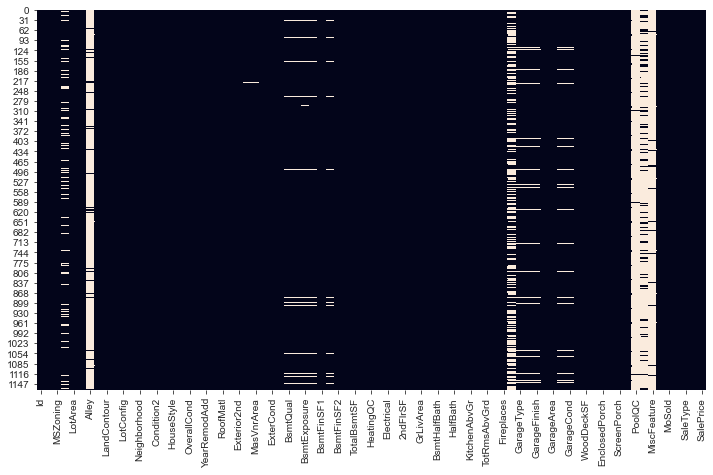

In [6]:
# Let's check the null values using graphical representation
plt.figure(figsize=(12,7))
sns.heatmap(df_train.isnull(),cbar=False)
plt.show()

###### Observations :
* Some columns like `Alley, PoolQC, Fence, MiscFeature` contains too much of null values.
* While a few columns like `BsmtQual ,BsmtExposure, BsmtFinSF1 ,BsmtFinSF2` contains less null values.

In [7]:
# create a function to find percentage of null values
def null_values(dataframe):
    null_columns =[]      # empty list to store data
    values =[]
    print("NUll values :")
    for i in dataframe:
        if dataframe[i].isna().sum()>0:
            print(i," - {} %.".format(round((dataframe[i].isnull().sum()/dataframe.shape[0])*100,2)))
            null_columns.append(i)
            values.append(round((dataframe[i].isnull().sum()/dataframe.shape[0])*100,2))
    # for graphical view of null values 
    plt.figure(figsize=(10,4))
    plt.bar(x=null_columns,height=values,width=1,edgecolor="maroon",color="lightcoral")
    plt.xticks(rotation=90)
    plt.title("Percentage of null values present in columns",color="navy",fontsize=14,pad=12)
    plt.ylabel("% of null values",color='b',fontsize=14)
    plt.axhline(y=7,linewidth=2,linestyle='dashed', color='deepskyblue')

NUll values :
LotFrontage  - 18.32 %.
Alley  - 93.41 %.
MasVnrType  - 0.6 %.
MasVnrArea  - 0.6 %.
BsmtQual  - 2.57 %.
BsmtCond  - 2.57 %.
BsmtExposure  - 2.65 %.
BsmtFinType1  - 2.57 %.
BsmtFinType2  - 2.65 %.
FireplaceQu  - 47.17 %.
GarageType  - 5.48 %.
GarageYrBlt  - 5.48 %.
GarageFinish  - 5.48 %.
GarageQual  - 5.48 %.
GarageCond  - 5.48 %.
PoolQC  - 99.4 %.
Fence  - 79.71 %.
MiscFeature  - 96.23 %.


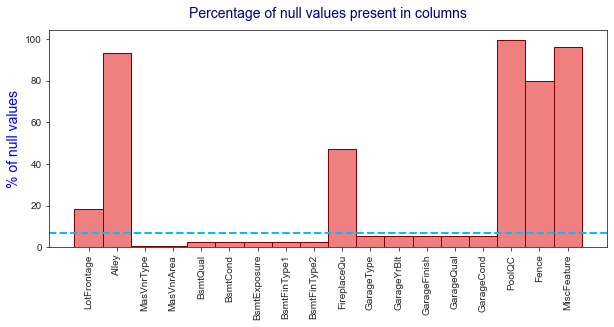

In [8]:
# Let's check null values in train dataset
null_values(df_train)

###### Observations :
* from above we can clearly see that 4 variables contains null values more than 80% of total data.
  * PoolQC contains null values - 99.4 %
  * MiscFeature contains null values - 96.23 %
  * Fence contains null values - 79.71 %
  * Alley contains null values - 93.41 %
* While the blue line is drawn at 7% of missing values, below this line we can drop the missing values and it will not impact our prediction so much, but dropping above it will be more data loss which will not be suitable for our model.
* So 9-10 variables contains missing values less than 7%.

In [9]:
# Checking is there any duplicated data preset
df_train.duplicated().sum().any()

False

In [10]:
# Checking descriptive information of variables
df_train.describe().transpose()

count           mean           std      min        25%  \
Id             1168.0     724.136130    416.159877      1.0     360.50   
MSSubClass     1168.0      56.767979     41.940650     20.0      20.00   
LotFrontage     954.0      70.988470     24.828750     21.0      60.00   
LotArea        1168.0   10484.749144   8957.442311   1300.0    7621.50   
OverallQual    1168.0       6.104452      1.390153      1.0       5.00   
OverallCond    1168.0       5.595890      1.124343      1.0       5.00   
YearBuilt      1168.0    1970.930651     30.145255   1875.0    1954.00   
YearRemodAdd   1168.0    1984.758562     20.785185   1950.0    1966.00   
MasVnrArea     1161.0     102.310078    182.595606      0.0       0.00   
BsmtFinSF1     1168.0     444.726027    462.664785      0.0       0.00   
BsmtFinSF2     1168.0      46.647260    163.520016      0.0       0.00   
BsmtUnfSF      1168.0     569.721747    449.375525      0.0     216.00   
TotalBsmtSF    1168.0    1061.095034    442.272249      0.0     799.00   
1stFlrSF       1168.0    1169.860445    391.161983    334.0     892.00   
2ndFlrSF       1168.0     348.826199    439.696370      0.0       0.00   
LowQualFinSF   1168.0       6.380137     50.892844      0.0       0.00   
GrLivArea      1168.0    1525.066781    528.042957    334.0    1143.25   
BsmtFullBath   1168.0       0.425514      0.521615      0.0       0.00   
BsmtHalfBath   1168.0       0.055651      0.236699      0.0       0.00   
FullBath       1168.0       1.562500      0.551882      0.0       1.00   
HalfBath       1168.0       0.388699      0.504929      0.0       0.00   
BedroomAbvGr   1168.0       2.884418      0.817229      0.0       2.00   
KitchenAbvGr   1168.0       1.045377      0.216292      0.0       1.00   
TotRmsAbvGrd   1168.0       6.542808      1.598484      2.0       5.00   
Fireplaces     1168.0       0.617295      0.650575      0.0       0.00   
GarageYrBlt    1104.0    1978.193841     24.890704   1900.0    1961.00   
GarageCars     1168.0       1.776541      0.745554      0.0       1.00   
GarageArea     1168.0     476.860445    214.466769      0.0     338.00   
WoodDeckSF     1168.0      96.206336    126.158988      0.0       0.00   
OpenPorchSF    1168.0      46.559932     66.381023      0.0       0.00   
EnclosedPorch  1168.0      23.015411     63.191089      0.0       0.00   
3SsnPorch      1168.0       3.639555     29.088867      0.0       0.00   
ScreenPorch    1168.0      15.051370     55.080816      0.0       0.00   
PoolArea       1168.0       3.448630     44.896939      0.0       0.00   
MiscVal        1168.0      47.315068    543.264432      0.0       0.00   
MoSold         1168.0       6.344178      2.686352      1.0       5.00   
YrSold         1168.0    2007.804795      1.329738   2006.0    2007.00   
SalePrice      1168.0  181477.005993  79105.586863  34900.0  130375.00   

                    50%       75%       max  
Id                714.5    1079.5    1460.0  
MSSubClass         50.0      70.0     190.0  
LotFrontage        70.0      80.0     313.0  
LotArea          9522.5   11515.5  164660.0  
OverallQual         6.0       7.0      10.0  
OverallCond         5.0       6.0       9.0  
YearBuilt        1972.0    2000.0    2010.0  
YearRemodAdd     1993.0    2004.0    2010.0  
MasVnrArea          0.0     160.0    1600.0  
BsmtFinSF1        385.5     714.5    5644.0  
BsmtFinSF2          0.0       0.0    1474.0  
BsmtUnfSF         474.0     816.0    2336.0  
TotalBsmtSF      1005.5    1291.5    6110.0  
1stFlrSF         1096.5    1392.0    4692.0  
2ndFlrSF            0.0     729.0    2065.0  
LowQualFinSF        0.0       0.0     572.0  
GrLivArea        1468.5    1795.0    5642.0  
BsmtFullBath        0.0       1.0       3.0  
BsmtHalfBath        0.0       0.0       2.0  
FullBath            2.0       2.0       3.0  
HalfBath            0.0       1.0       2.0  
BedroomAbvGr        3.0       3.0       8.0  
KitchenAbvGr        1.0       1.0       3.0  
TotRmsAbvGrd        6.0  

###### Observations :
1. `MasVnrArea, BsmtFinSF2, 2ndFlrSF, LowQualFinSF, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, MiscVal` these variables having high huge difference between mean and median values which indicates presence of outliers.
2. Some varibbles having `minimum values 0, 25th percetile also 0, and some upto 75th percentile values equal to 0`.
3. There is `huge difference in variables values`. Some having `small range values while some high range` values. It may impact the model efficiency if we use the dataset without scaling in proper format.

##### Stastistics of Target Variable

In [11]:
# Minimum saleprice of the data
minimum_price = np.amin(df_train.SalePrice)

# Maximum saleprice of the data
maximum_price = np.amax(df_train.SalePrice)

# Mean saleprice of the data
mean_price = np.mean(df_train.SalePrice)

# Median saleprice of the data
median_price = np.median(df_train.SalePrice)

# Standard deviation of SalePrice of the data
std_price = np.std(df_train.SalePrice)

# Show the calculated statistics
print("Statistics for Australian housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of SalePrice: ${}".format(std_price))

Statistics for Australian housing dataset:

Minimum price: $34900
Maximum price: $755000
Mean price: $181477.0059931507
Median price $163995.0
Standard deviation of SalePrice: $79071.71591913489


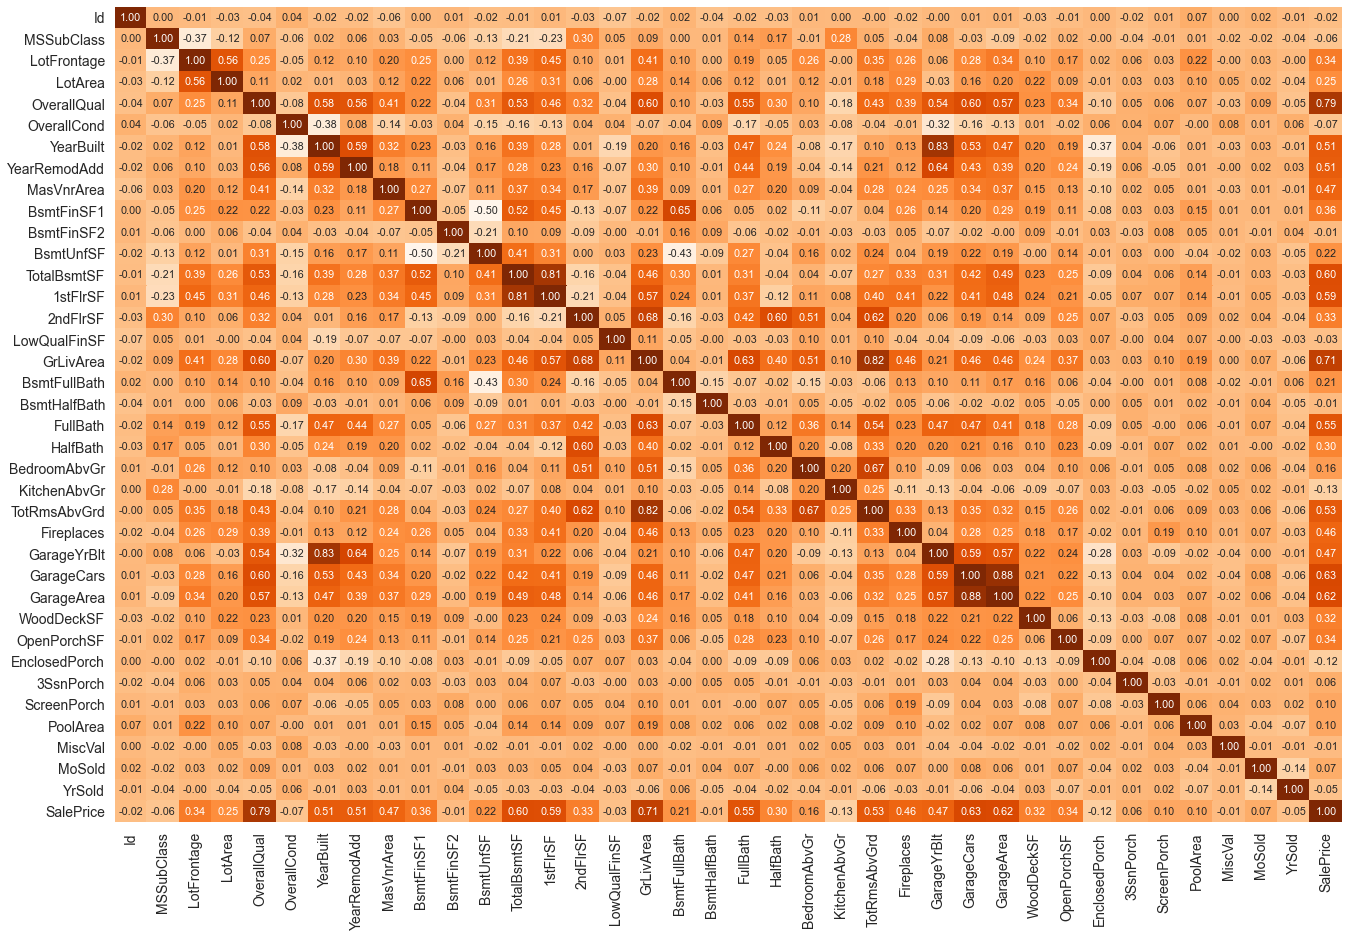

In [12]:
# Let's plot the correlation heatmap to find the correlation between target and independent variables

plt.figure(figsize=(22,15))
sns.set(font_scale=.9)
sns.heatmap(df_train.corr(),annot=True,fmt='.2f',cmap='Oranges',cbar=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

###### Observations :
* OverallQual (Overall quality) is the highest correlated variables among all. It is `80% directly` correlated with the target variable, which means that the increase in OverallQual of house will going to increase the  SalePrice of house or vice-versa.
* After OverallQual, `GrLivArea (Grid Living Area)` is in more than `70% direct` correlation with target variable.
* Almost all the variables with some correlation above `20%-30%` are in direct relationship with target variable.
* Some variables like `KitchenAbvGr, EnclosedProch,` etc are indirectly correlated with Target variable but the degree of correltaion is very low.
* While some cases are present where there is high direct and indirect relationship between independent variables. It will create a problem of multicollinearity and it may distort our model efficiency.
* Variables like `GarageYrBuilt` and `YrBuilt` are having above 80% of direct correlation.
    
    `TotalRmsAbvGrd and GrLivArea` also having 80% direct correlation.
    ` GarageArea and GarageCars` having 88% direct correlation.
       
* While `BsmntUnf and BsmtFinSf1` having 50% indirect correlation wiht each other.
    
    `BsmntFullBath and BsmntUnf` having 43% of indirect correaltion wiht eacch other.


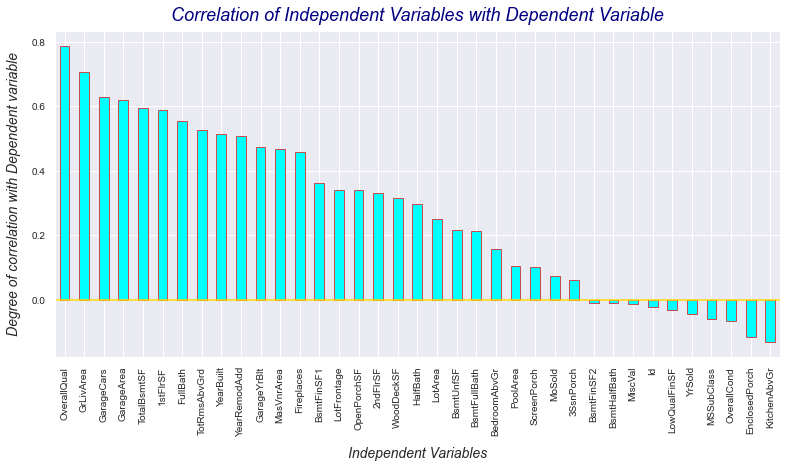

In [13]:
# Using graphical view to understand the degree of correlation of variables 

plt.figure(figsize=(13,6))
df_train.corr()["SalePrice"].sort_values(ascending=False).drop(["SalePrice"]).plot.bar(color='aqua',edgecolor='r')

ttext = plt.title("Correlation of Independent Variables with Dependent Variable",loc='center',fontsize=18,pad=10) 
plt.setp(ttext, color='navy', style='italic')
plt.setp(plt.xlabel('Independent Variables',fontsize=14,labelpad=10), style='italic')
plt.setp(plt.ylabel("Degree of correlation with Dependent variable",fontsize=14,labelpad=10), style='italic')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.axhline(y=0,linestyle="-",color='gold')
plt.show()

###### Observations :
* As seen using heatmap, OverallQual is the most correlated variable with target variable and then GrLivArea ,GarageCars ,GarageArea etc.
* Number of KitchenAbvGr will signify that there is indirect relationship with target variable. More the number less will be the SalePrice. Through it we can say that people will not prefer more kitchen above grounds.
* Variables like BsmtHalfBath, BsmtFinSF2, MiscVal and id are having no relationship with target variable. 

In [14]:
# copy dataset
train=df_train.copy()

# Data Cleaning

In [15]:
# dropping unnecessary column
train.drop(columns="Id",axis=1,inplace=True)

In [16]:
# dropping columns with too much of null values 
train.drop(columns=['Alley','PoolQC','MiscFeature','Fence'],axis=1,inplace=True)

In [17]:
# filling null values in fireplaceQu
train['FireplaceQu']=train['FireplaceQu'].fillna("No fireplace")

# filling null values in LotFrontage
# median values gives better match for null values so fillingg null values with median values
train['LotFrontage'].fillna(train['LotFrontage'].median(),inplace=True)

# filling null values in MasVnrType 
train['MasVnrType'].fillna("None",inplace=True)

# filling null values in MasVnrArea  
train['MasVnrArea'].fillna(train['MasVnrArea'].median(),inplace=True)

# filling null values in BsmtQual   
train['BsmtQual'].fillna("No Basement",inplace=True)

# filling null values in BsmtCond     
train['BsmtCond'].fillna("No Basement",inplace=True)

# filling null values in BsmtExposure    
train['BsmtExposure'].fillna("No Basement",inplace=True)

# filling null values in BsmtFinType1     
train['BsmtFinType1'].fillna("No Basement",inplace=True)

# filling null values in BsmtFinType2      
train['BsmtFinType2'].fillna("No Basement",inplace=True)

# filling null values in GarageType      
train['GarageType'].fillna("No Garage",inplace=True)

# filling null values in GarageYrBlt       
train['GarageYrBlt'].fillna(train['GarageYrBlt'].median(),inplace=True)

# filling null values in GarageFinish       
train['GarageFinish'].fillna("No Garage",inplace=True)

# filling null values in GarageQual       
train['GarageQual'].fillna("No Garage",inplace=True)

# filling null values in GarageCond        
train['GarageCond'].fillna("No Garage",inplace=True)

NUll values :


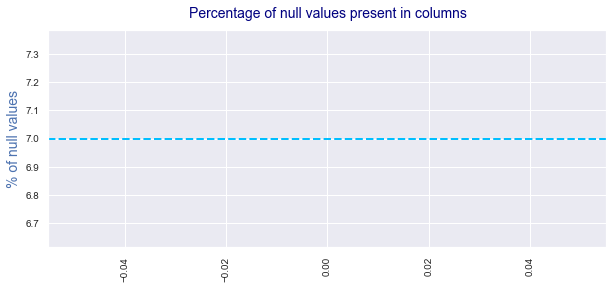

In [18]:
null_values(train)

In [19]:
# Let's add a new column containing the difference of YearBuilt and YrSold.
train['YearOld'] = train['YrSold'] - train['YearBuilt']
train['GarageYrOld'] = train['YrSold'] - train['GarageYrBlt']
train['YrOldRemod'] = train['YrSold'] - train['YearRemodAdd']

# Now drop both the columns
#train.drop(columns=['YearBuilt','YrSold','GarageYrBlt','YearRemodAdd'],axis=1, inplace=True)

# Exploratory Analysis

In [20]:
# Create function for understanding the data using bargraph
sns.set_style("whitegrid")

def barplots(dataframe,col):
    if dataframe[col].dtypes=='object':
        f=plt.figure(figsize=(14,5))
        
        f.add_subplot(1,2,1)
        sns.countplot(x=col,data=dataframe,palette='rainbow')
        ttext = plt.title(" Univariate analysis of "+col,color='maroon',fontsize=16,pad=13)
        
        plt.setp(ttext,color='maroon',style='italic')
        plt.setp(plt.xlabel(col,fontsize=12,labelpad=10), style='italic')
        plt.setp(plt.ylabel("Count",fontsize=12,labelpad=10), style='italic')
        
        plt.xticks(fontsize=11,rotation=90)
        plt.yticks(fontsize=11)
        
        f.add_subplot(1,2,2)
        sns.barplot(x=col,y='SalePrice',data=dataframe,palette='rainbow')
        
        ttext2 = plt.title(" Bivariate analysis of SalePrice and "+col,color='maroon',fontsize=16,pad=13)
        plt.setp(ttext2,color='maroon',style='italic')
        plt.setp(plt.xlabel(col,fontsize=12,labelpad=10), style='italic')
        plt.setp(plt.ylabel("Average SalePrice",fontsize=12,labelpad=10), style='italic')
        plt.xticks(fontsize=11,rotation=90)
        plt.yticks(fontsize=11)
        
        plt.show()        

In [21]:
# Creating function for drawing pie plots of below variables
pie_columns=['Street','Utilities','LandSlope','ExterQual','BsmtQual','CentralAir','GarageFinish']

def pie_chart(dataframe):
    for i in pie_columns:
        plt.figure(figsize=(10,6))
        plt.subplot(122)
        
        plt.pie(x=dataframe[i].value_counts(),labels=dataframe[i].value_counts().index,
                shadow=True, startangle=60,autopct='%1.1f%%',colors=['steelblue', 'limegreen', 'r', 'y'],
               wedgeprops = {'linewidth': 3.8})
        plt.title("Distribution of categorical column - "+i,fontsize=15,color='darkred')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()
        

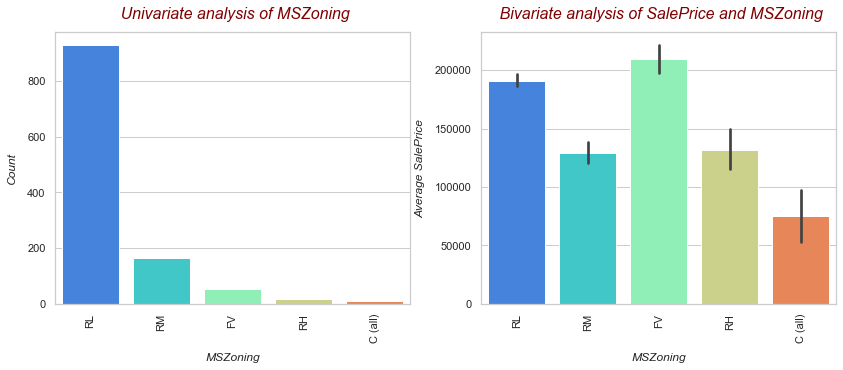

In [22]:
barplots(train,'MSZoning')

###### MSZoning: Identifies the general zoning classification of the sale.
       A	Agriculture                     C	Commercial
       FV	Floating Village Residential    I	Industrial
       RH	Residential High Density        RL	Residential Low Density
       RP	Residential Low Density Park    RM	Residential Medium Density
###### Observations:
* Univariate analysis - There are many characters in this variables but Residental Low Density alone present in more than 70% of data. 
* Bivariate analysis - Maximum SalePrice is present in `Floating village Residenta` and them `Residental Low Density`.  
* Comparing the variation in SalePrice , Resdiential Low Density area having least and  Commercial(C) area having highest variations.

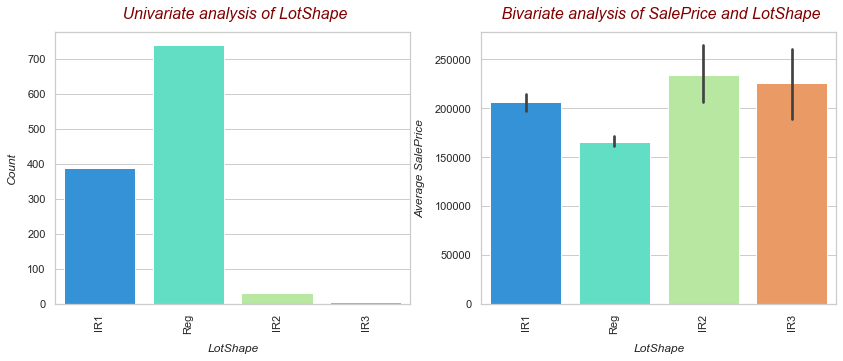

In [23]:
barplots(train,'LotShape')

######  LotShape: represents the general shape of property
       Reg	Regular	                          IR1	Slightly irregular
       IR2	Moderately Irregular              IR3	Irregular
###### Observations: 
* Univariate analysis - It shows that most of the data present is of Regular in nature. A little bit of data is Moderate or high irregular in nature.
* Bivariate analysis - There is not much difference in maximum SalePrice of `Moderately Irregular (IR2) and Irregular (IR3)` with high variation in SalePRice also.
* While Regular (Reg) shape of property having least variation in SalePRice.

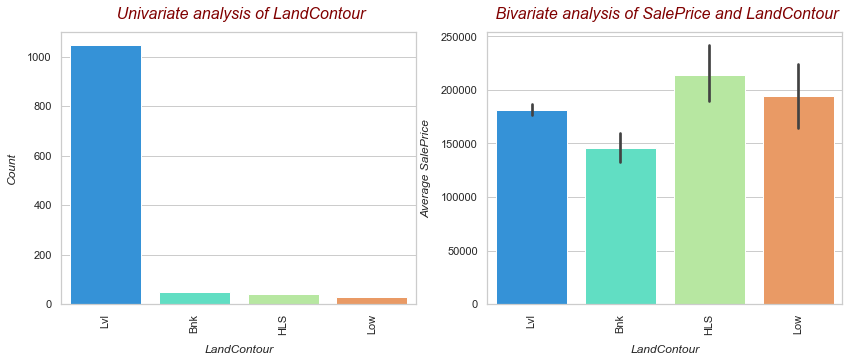

In [24]:
barplots(train,'LandContour')

###### LandContour:  represents the flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
###### Observations:
* Univariate analysis - It shows that data of flat level is more than other type of leveling.
* Bivariate analysis - `Hillside` property with significant slope from side to side having maximum SalePrice and also high variations in SalePrice of house.

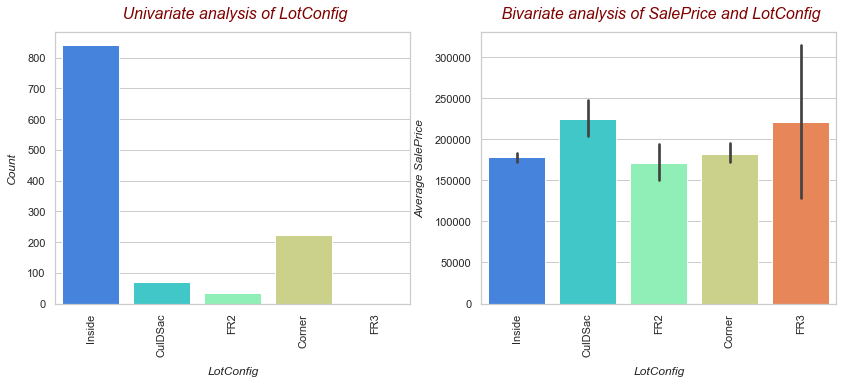

In [25]:
barplots(train,'LotConfig')

###### LotConfig: represents the  Lot configuration
       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
###### Observations:
* Univariate analysis - Insider lot configuration data is more present 
* Bivariate analysis - Both `Corner lot % Frontage on 3 sides ` sharing maximum SalePrice ,but the variation in `FFR` in SalePRice is too much high.

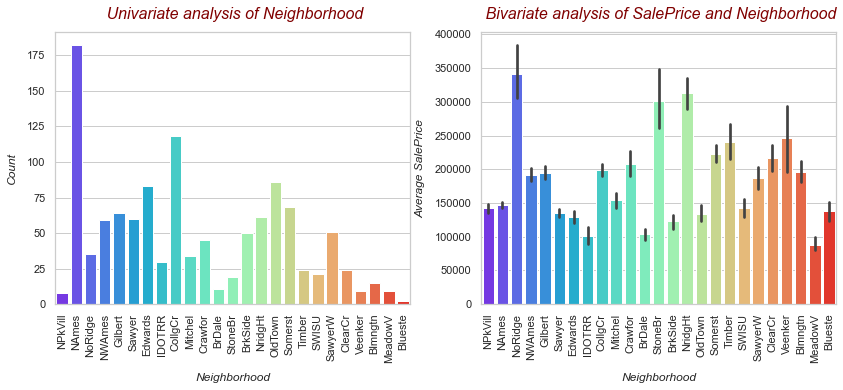

In [26]:
barplots(train,'Neighborhood')

###### Neighborhood: represents physical locations within Ames city limits.
###### Observations:
* Univariate analysis - Northwest Ames(NAmes) count is more in dataset
* Bivariate analysis - Highest SalePrice is present in `NoRidge` and after that after that `StoneBr and nindgHt` having high Price of house.
* Also thses locations  having highest variations in SalePrice.

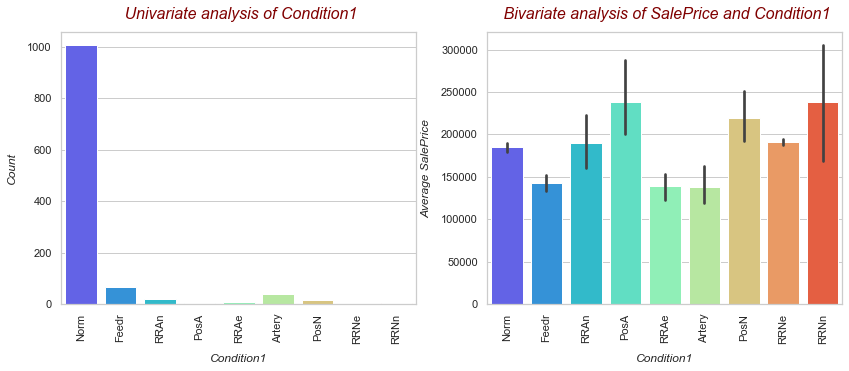

In [27]:
barplots(train,'Condition1')

###### Condition1: represents proximity to various conditions
       Artery - Adjacent to arterial street
       Feedr - Adjacent to feeder street	
       Norm	- Normal	
       RRNn	- Within 200' of North-South Railroad
       RRAn	- Adjacent to North-South Railroad
       PosN	- Near positive off-site feature--park, greenbelt, etc.
       PosA	- Adjacent to postive off-site feature
       RRNe	- Within 200' of East-West Railroad
       RRAe	- Adjacent to East-West Railroad
###### Observations: 
* Univariate analysis - 
* Bivariate analysis - `Within 200' of North-South Railroad, Adjacent to postive off-site feature,Near positive off-site feature--park, greenbelt, etc.` properties present in these areas having high SalePRice as compared to others.

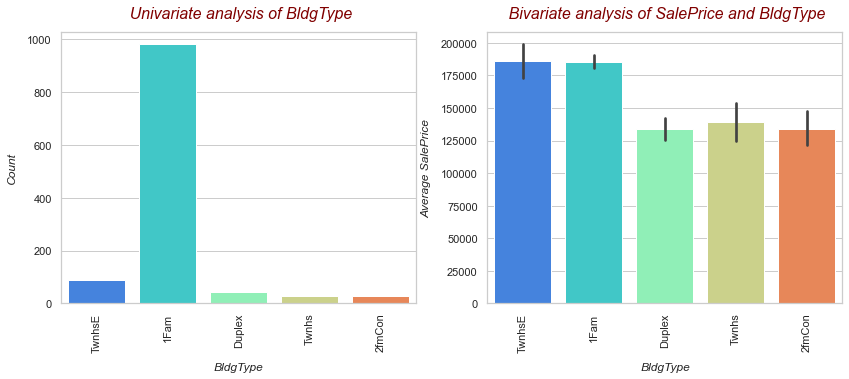

In [28]:
barplots(train,'BldgType')

###### BldgType: represents type of dwelling
		
       1Fam	- Single-family Detached	
       2FmCon - Two-family Conversion; originally built as one-family dwelling
       Duplx - Duplex
       TwnhsE - Townhouse End Unit
       TwnhsI - Townhouse Inside Unit
###### Observations:
* Univariate analysis - `Single Family Detached (1Fam)` data is more in mumber.
* Bivariate analysis - While `Singel Family Detached and Townhouse End Unit` having highest SalePRice, but in `TownHouse End Unit` variation in price is high than 1Fam.

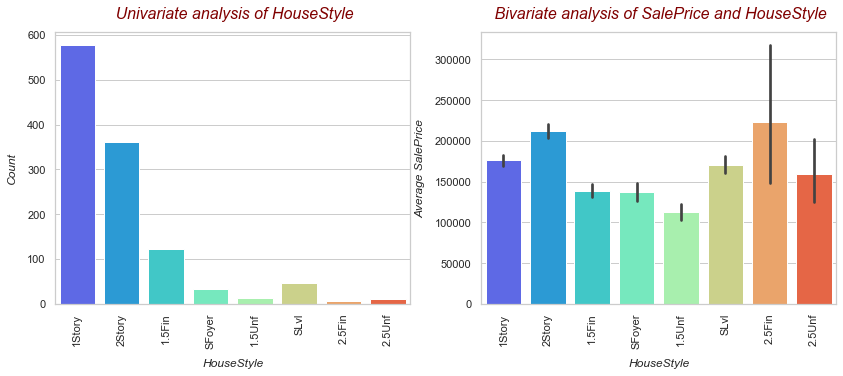

In [29]:
barplots(train,'HouseStyle')

###### HouseStyle: represents style of dwelling
	
       1Story - One story
       1.5Fin -	One and one-half story: 2nd level finished
       1.5Unf -	One and one-half story: 2nd level unfinished
       2Story -	Two story
       2.5Fin -	Two and one-half story: 2nd level finished
       2.5Unf -	Two and one-half story: 2nd level unfinished
       SFoyer -	Split Foyer
       SLvl   -	Split Level
###### Observations :
* Univariate analysis - One story and two story house are more in number.
* Bivariate analysis - `2.5Fin -	Two and one-half story: 2nd level finished, and Two story(2story)` house are having highest SalePrice and variations are very high in 2.5 story house.

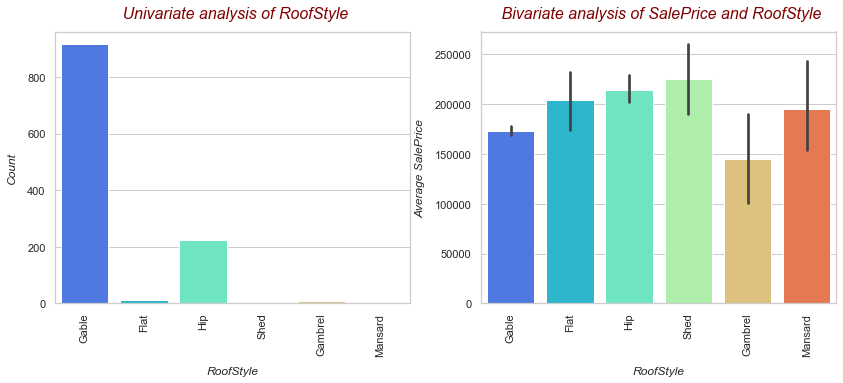

In [30]:
barplots(train,'RoofStyle')

##### RoofStyle: represents type of roof

       Flat	   - Flat                                  Gable   - Gable
       Gambrel - Gabrel (Barn)                         Hip	   - Hip
       Mansard - Mansard                               Shed	   - Shed
###### Observations:
* Univariate analysis - `Gabel` type of roof data is more .
* Bivariate analysis - `Gabrel (barn)` type of roof having least SalePrice and all others are having not much difference in SalePrice.

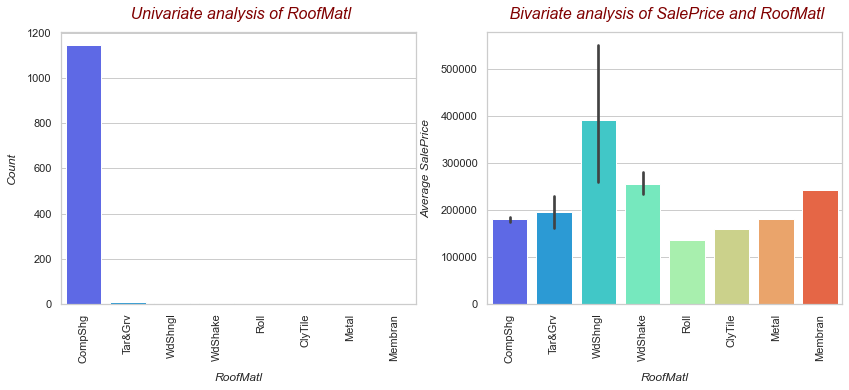

In [31]:
barplots(train,'RoofMatl')

###### RoofMatl: represents roof material

       ClyTile	Clay or Tile                 CompShg	Standard (Composite) Shingle
       Membran	Membrane                     Metal	Metal
       Roll	Roll                             Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes                  WdShngl	Wood Shingles
###### Observations :
* Univariate analysis - `Standard (Composite) Shingle` material is mostly used.
* Bivariate anlaysis - `Wood Shingles` type of roof material is having highest SalePRice and after that Wood Shakes having high SalePrice.

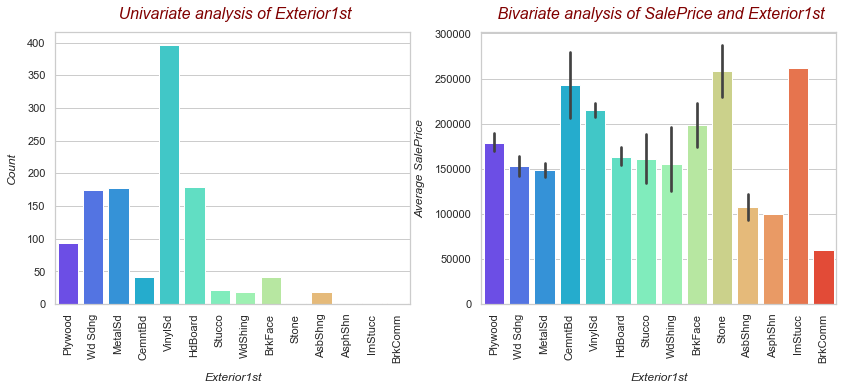

In [32]:
barplots(train,'Exterior1st')

###### Exterior1st: represents exterior covering on house

       AsbShng	Asbestos Shingles                     AsphShn	Asphalt Shingles
       BrkComm	Brick Common                          BrkFace	Brick Face
       CBlock	Cinder Block                          CemntBd	Cement Board
       HdBoard	Hard Board                            ImStucc	Imitation Stucco
       MetalSd	Metal Siding                          Other	Other
       Plywood	Plywood                               PreCast	PreCast	
       Stone	Stone                                 Stucco	Stucco
       VinylSd	Vinyl Siding                          Wd Sdng	Wood Siding
       WdShing	Wood Shingles
###### Observations:
* UNivariate analysis - In most of the houses `Vinyl Siding` is used in exterior covering of house.
* Bivariate analysis - Houses in which `Imitation Stucco, Stone, Cement Board` are used ,having high SalePrice.

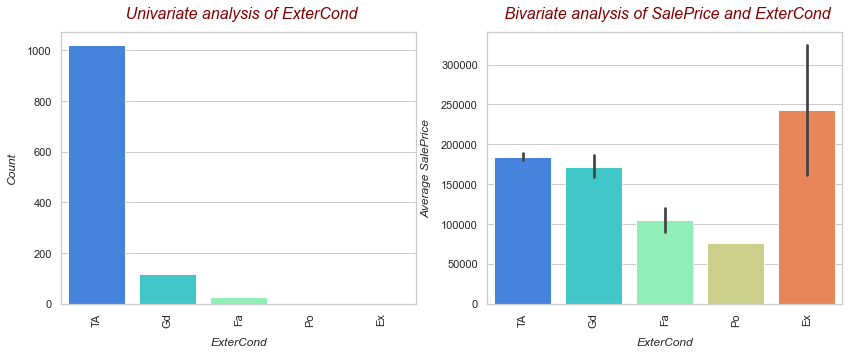

In [33]:
barplots(train,'ExterCond')

###### ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent                          Gd	Good
       TA	Average/Typical                    Fa	Fair
       Po	Poor
###### Observations :
* Univariate analysis - Houses with `Average/Typical` exterior material condition are more in numbers.
* Bivariate analysis - As it is natural ,house with `Excellent` exterior material condition are having high SalePrice.

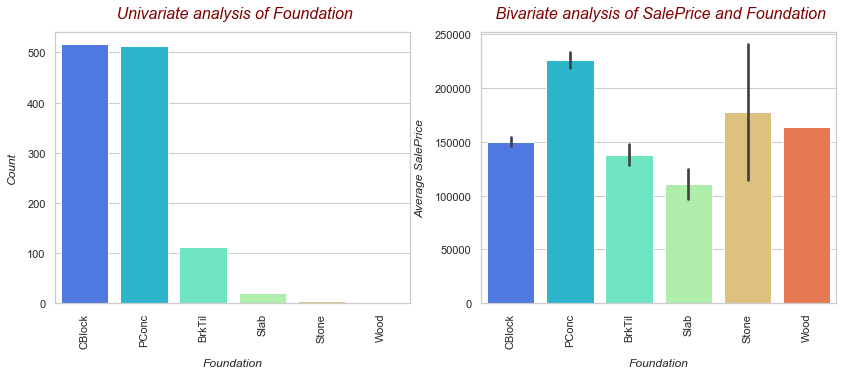

In [34]:
barplots(train,'Foundation')

###### Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
###### Observations :
* Univariate analysis - `Poured Concrete and Cinder Block` are mostly used in the foundation of house.
* Bivariate analysis - `Poured Concrete` in foundation of house having high SalePrice, while `Slab` used in foundation having least saleprice.

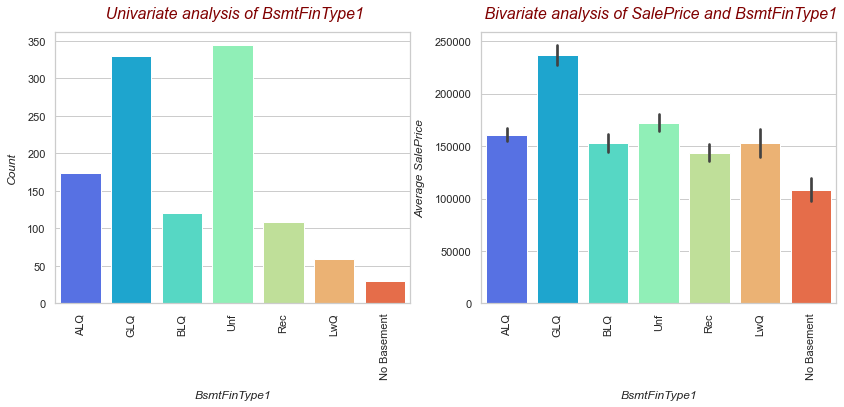

In [35]:
barplots(train,'BsmtFinType1')

###### BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
###### Observations :
* Univariate analysis - Most of the houses have Unfinished and Good Living Quaters.
* Bivariate anlaysis - `(GLQ) Good Living Quaters` are having high saleprice.

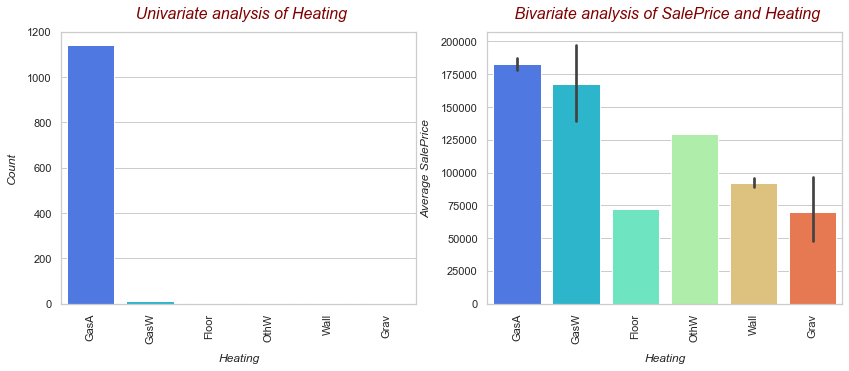

In [36]:
barplots(train,'Heating')

###### Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
###### Observations :
* Univariate analysis - Most of the houses having `Gas forced warm air Furnance` for the heating.
* Bivariate analysis - Where `Gas` is used in heating ,having high saleprice.

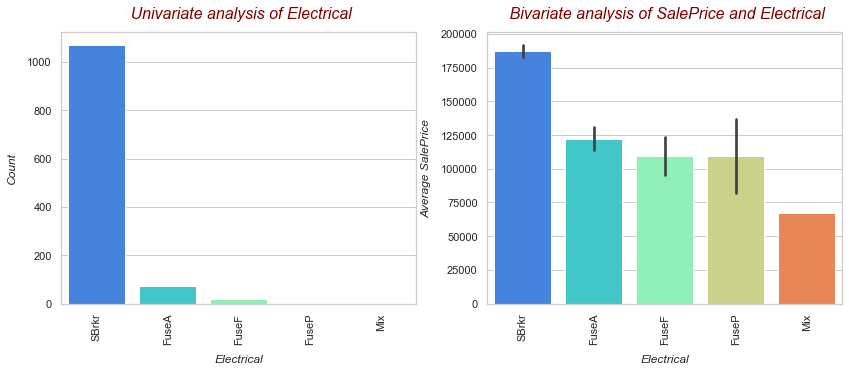

In [37]:
barplots(train,'Electrical')

###### Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
###### Observtions: 
* univariate analysis - most of the houses use `Standard Circuit Breakers & romex`.
* Bivariate analysis - `Standard Circuit Breakers & romex` electrical system having high salepricce 

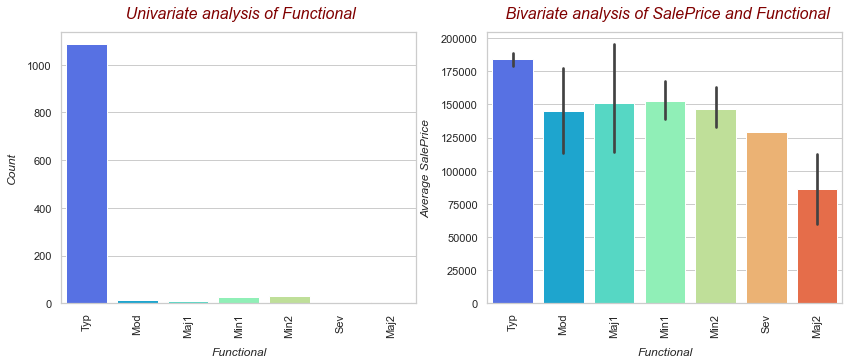

In [38]:
barplots(train,'Functional')

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

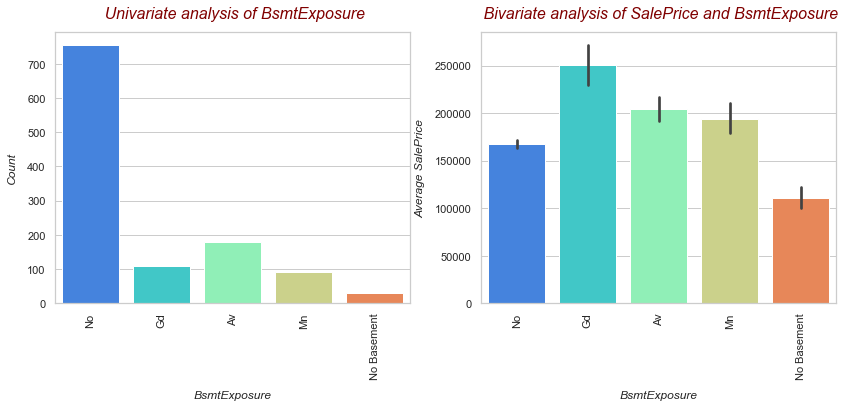

In [39]:
barplots(train,'BsmtExposure')

###### BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
###### Observations:
* Univariate analysis - Most of the houses are having `No exposure` means there are no garden walls present.
* Bivariate analysis - Houses with `Good Exposure` are having high sale price than others.

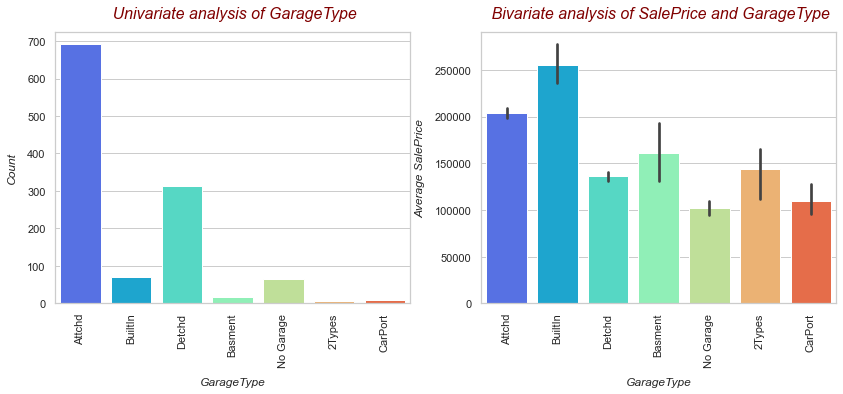

In [40]:
barplots(train,'GarageType')

###### GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
###### Observations:
* Univariate anlaysis - Most of the houses having `Attached` garage to home.
* Bivariate analysis - `Built-In and Attached` garages are having high saleprice.

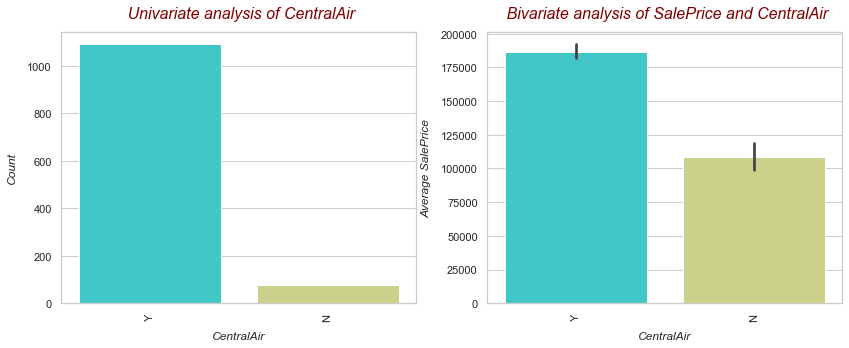

In [41]:
barplots(train,'CentralAir')

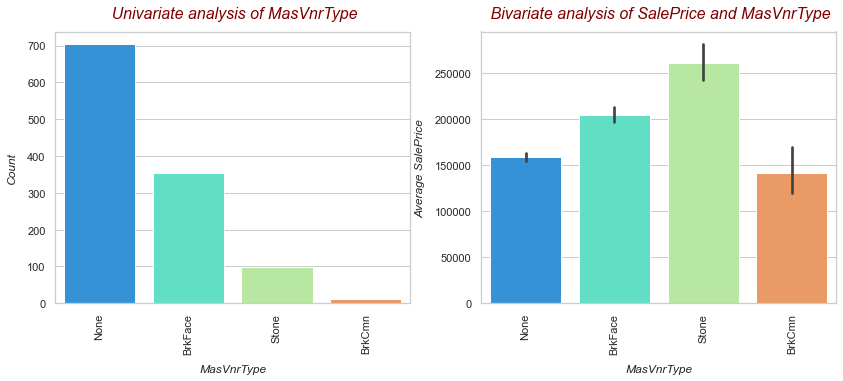

In [42]:
barplots(train,'MasVnrType')

###### MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
###### Observations:
* Univariate analysis - None type of masonry present in near about 700 houses.
* Bivariate analysis - ` Stone` masonary is having maximum saleprice.

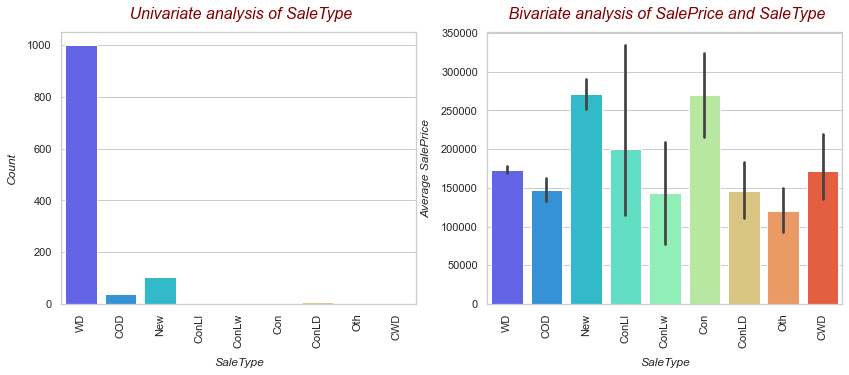

In [43]:
barplots(train,'SaleType')

###### SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional      CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan           New	Home just constructed and sold
       COD	Court Officer Deed/Estate         Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest         ConLD	Contract Low Down
       Oth	Other
###### Observations:
* Univariate analysis - `Warranty Deed-Conventional` type of sale is more in number.
* Bivariate analysis - `Home just constructed and sold, Contract 15% Down payment regular terms` type of sale having high saleprice.

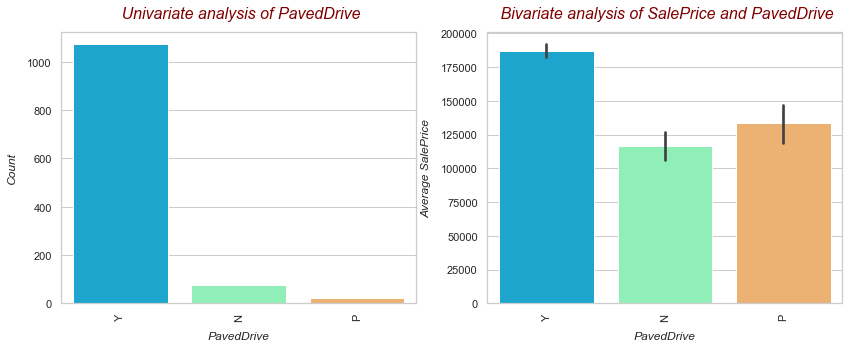

In [44]:
barplots(train,'PavedDrive')

###### PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
###### Observations :
* Univariate analysis - `Paved` driveway is present in most of the houses.
* Bivariate analysis - `Paved` drieway is also having high saleprice than partial and gravel driveway.

#### Pie Charts

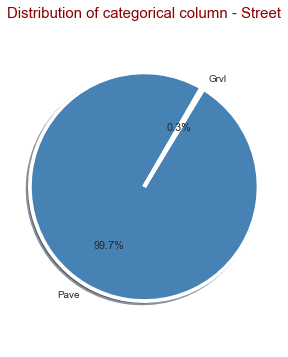

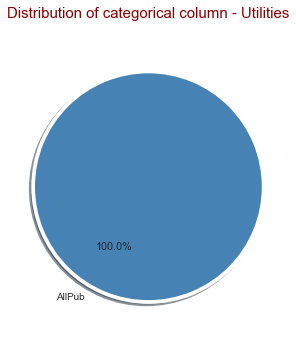

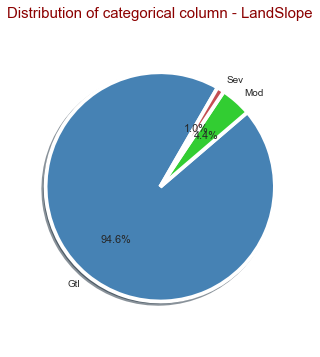

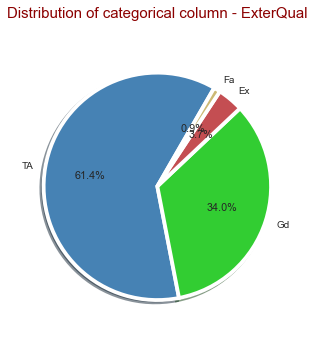

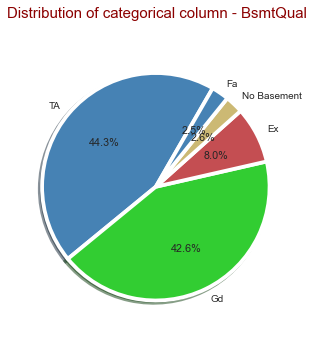

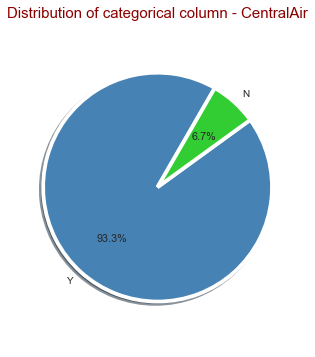

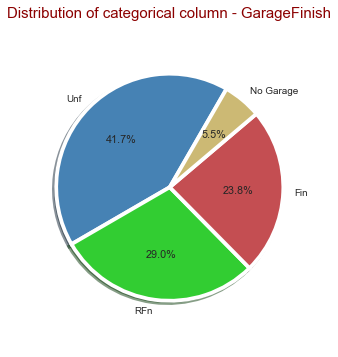

In [45]:
pie_chart(train)

##### Observations from piecharts:
* Variabel `Street & Utilities` having highly imbalanced dataset.
* `Utilities` is having almost 100% of single character.
*  Other variables left are also not properly balanced.

###  EDA on Numerical Variables

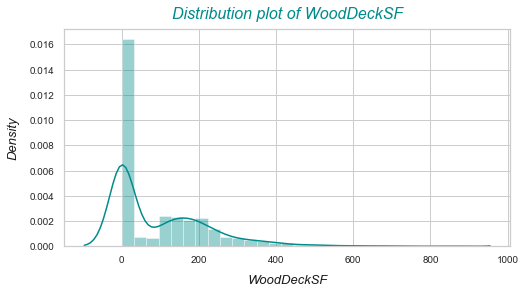

------------------------------------------------------------------------------------------


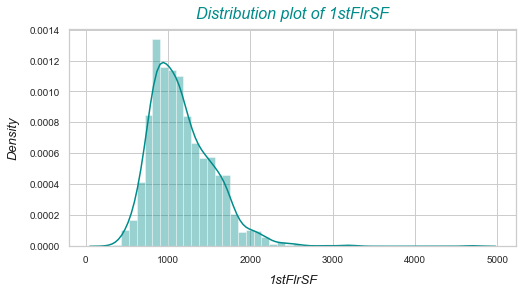

------------------------------------------------------------------------------------------


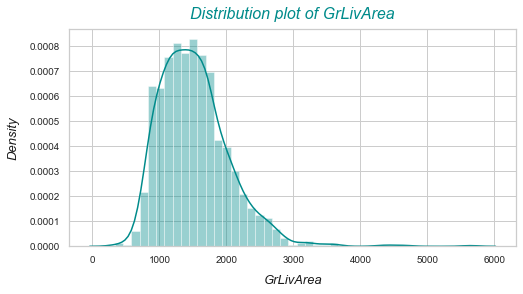

------------------------------------------------------------------------------------------


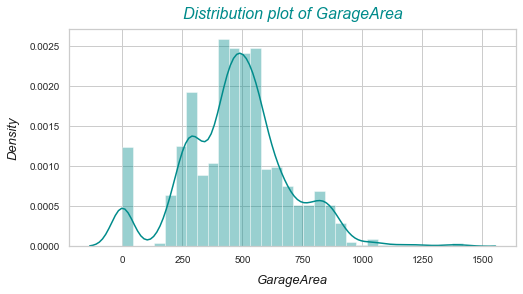

------------------------------------------------------------------------------------------


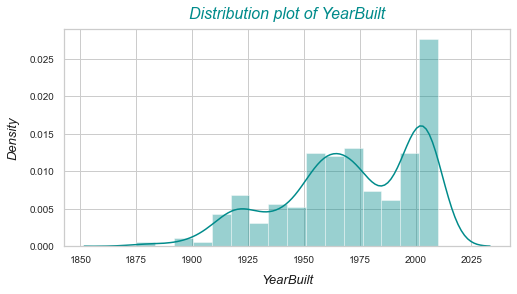

------------------------------------------------------------------------------------------


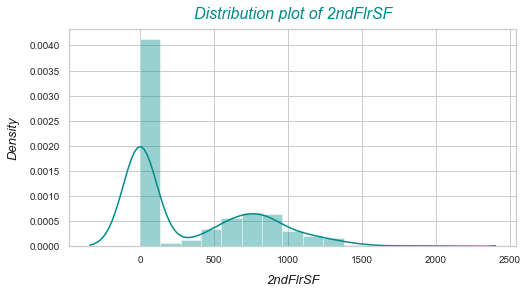

------------------------------------------------------------------------------------------


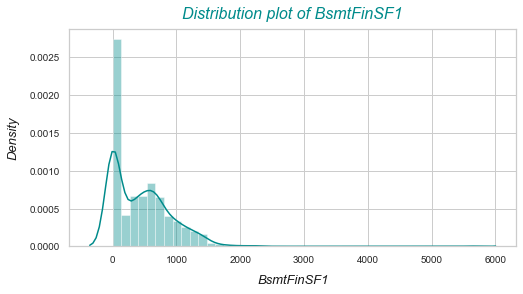

------------------------------------------------------------------------------------------


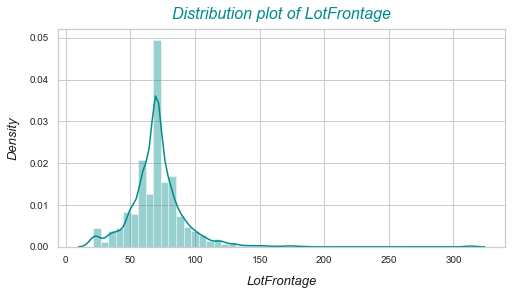

------------------------------------------------------------------------------------------


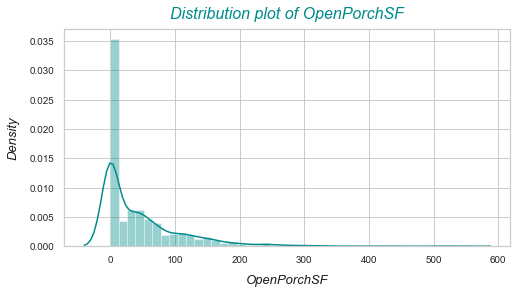

------------------------------------------------------------------------------------------


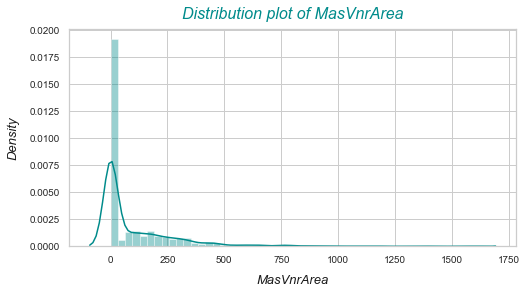

------------------------------------------------------------------------------------------


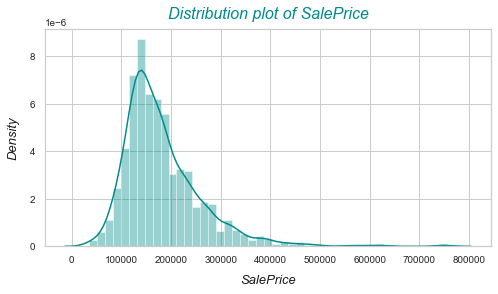

------------------------------------------------------------------------------------------


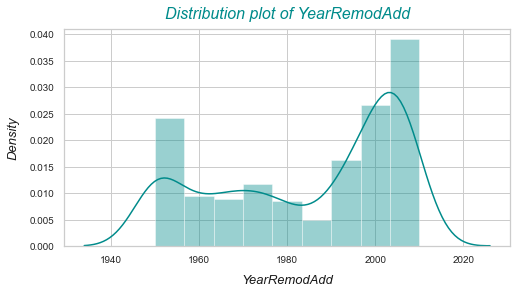

------------------------------------------------------------------------------------------


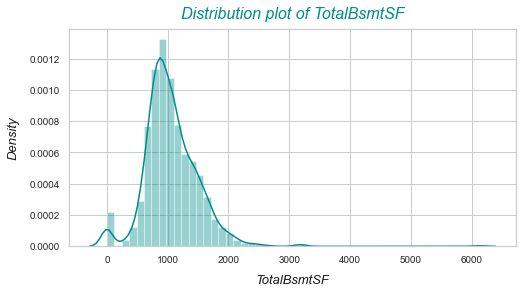

------------------------------------------------------------------------------------------


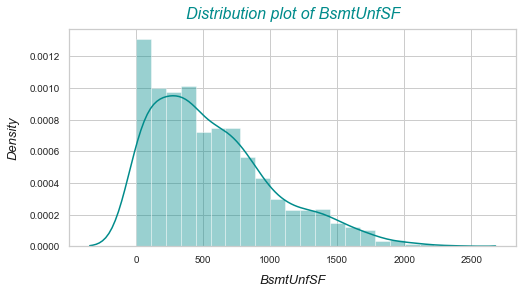

------------------------------------------------------------------------------------------


In [46]:
# Let's check the distribution of data in numerical variables
cols=['WoodDeckSF','1stFlrSF','GrLivArea','GarageArea','YearBuilt','2ndFlrSF','BsmtFinSF1',
      'LotFrontage','OpenPorchSF','MasVnrArea','SalePrice','YearRemodAdd','TotalBsmtSF',
      'BsmtUnfSF']

# Iterate the columns to view the distribution plot
for i in cols:
    #plt.style.use('dark_background')
    plt.figure(figsize=(8,4))
    sns.distplot(train[i],color='darkcyan',label="skew"+ str(np.round(train[i].skew(),2)))
    ttext = plt.title("Distribution plot of "+i,loc='center',fontsize=16,pad=10)
    xtext = plt.xlabel(i,labelpad=10)
    ytext = plt.ylabel("Density",labelpad=10)
    plt.setp(ttext,  color='darkcyan', style='italic')
    plt.setp(xtext, size='large', color='k', style='italic')
    plt.setp(ytext, size='large', color='k', style='italic')
    plt.show()
    print(45*"--")

##### Observations from Distplot :
* A lot of skewness is present in almost all the numerical columns.
* Skewness in variables shows that data is not distributed well.
* Except ` YearRemodAdd` variables all other variables are right skewed.
* Skewness in variables shows that data is not distributed well. We should treat outliers first.

In [47]:
# Create a function for scatterplot
def scatter_plot(dataframe):
    
    for i in dataframe.describe().columns:
        if i not in ["SalePrice",'YearBuilt','YrSold','YearRemodAdd','GarageYrBlt']:

            sns.set_style("white")
            plt.figure(figsize=(9,4))
            sns.regplot(x=i,y="SalePrice",data=dataframe,color='mediumseagreen',marker='.')
            plt.xlabel(i,fontsize=13,color='dimgrey')
            plt.ylabel(" Sales Price ",fontsize=13,color='dimgrey')
            plt.title("Scatter plot of SalePrice and "+i,color='r',fontsize=16)
            plt.show()
            print(30*"---")
        

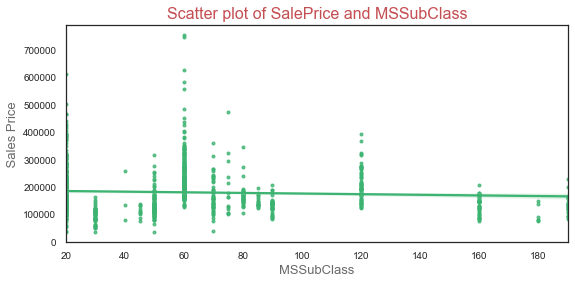

------------------------------------------------------------------------------------------


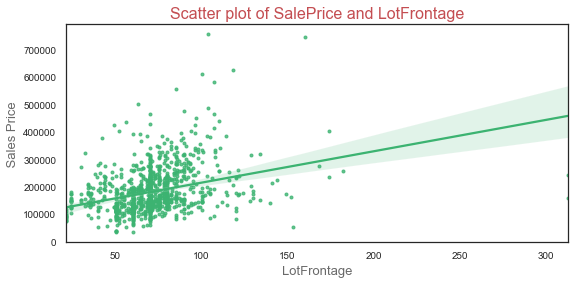

------------------------------------------------------------------------------------------


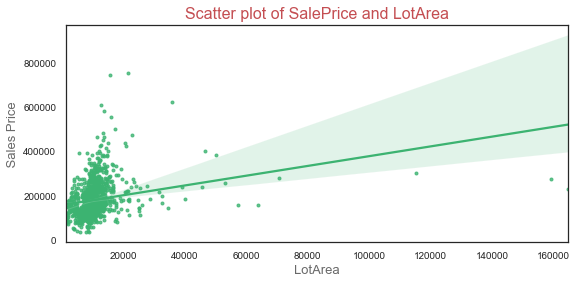

------------------------------------------------------------------------------------------


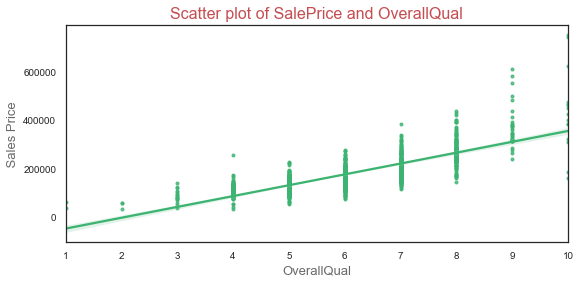

------------------------------------------------------------------------------------------


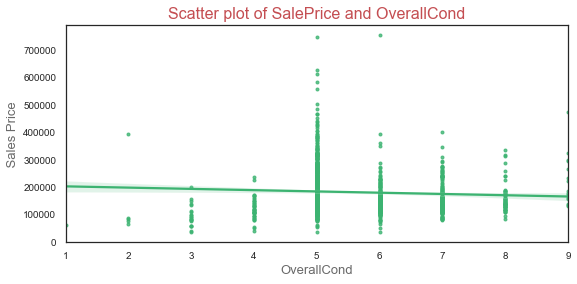

------------------------------------------------------------------------------------------


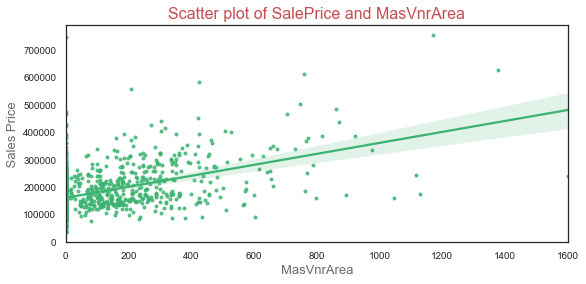

------------------------------------------------------------------------------------------


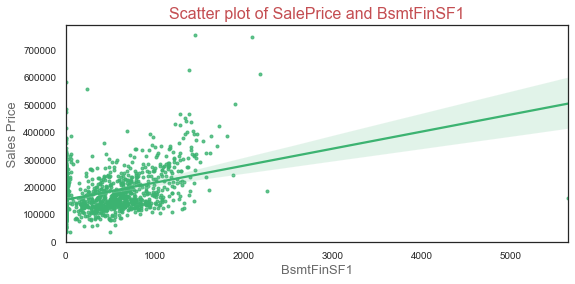

------------------------------------------------------------------------------------------


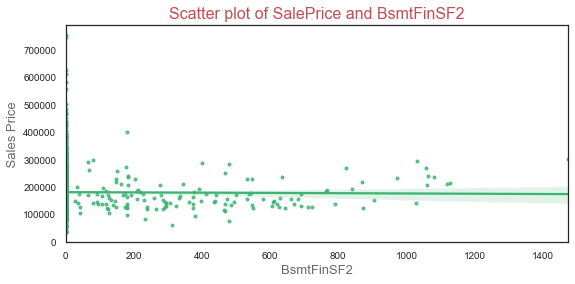

------------------------------------------------------------------------------------------


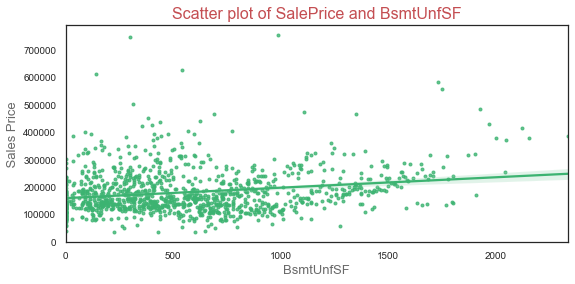

------------------------------------------------------------------------------------------


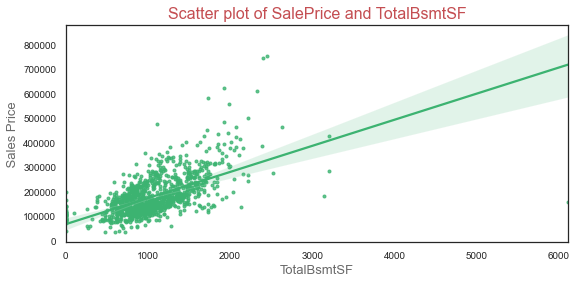

------------------------------------------------------------------------------------------


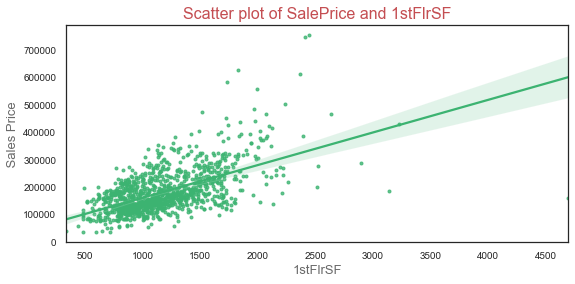

------------------------------------------------------------------------------------------


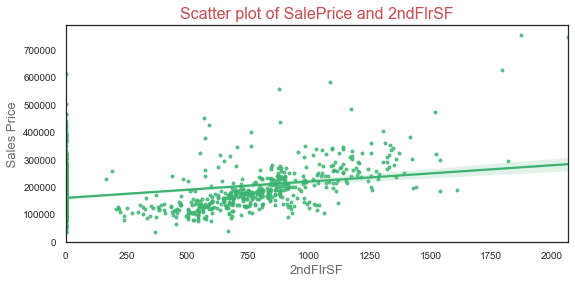

------------------------------------------------------------------------------------------


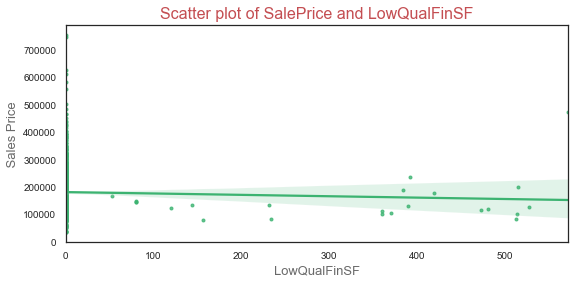

------------------------------------------------------------------------------------------


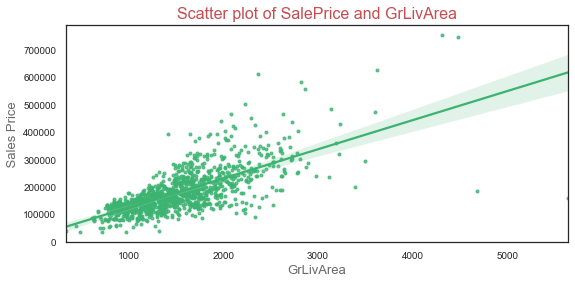

------------------------------------------------------------------------------------------


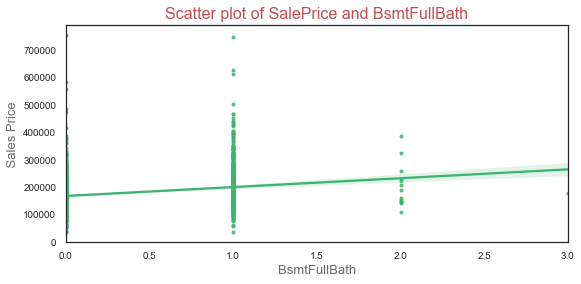

------------------------------------------------------------------------------------------


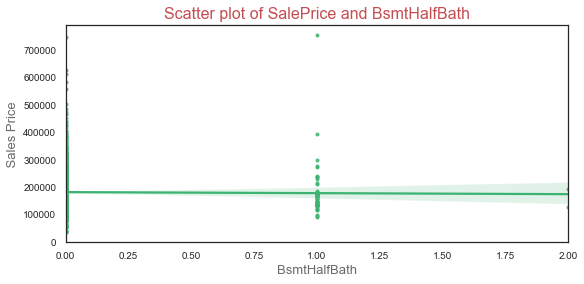

------------------------------------------------------------------------------------------


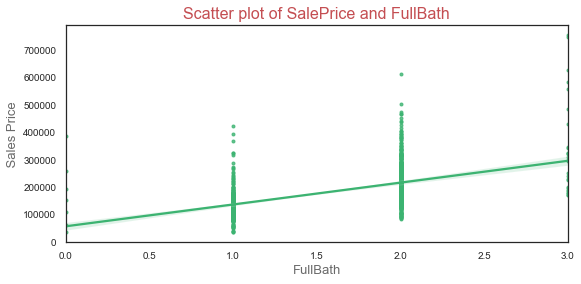

------------------------------------------------------------------------------------------


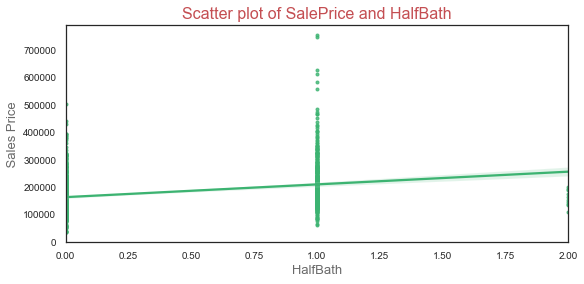

------------------------------------------------------------------------------------------


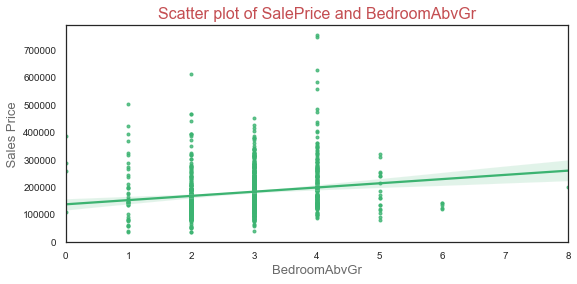

------------------------------------------------------------------------------------------


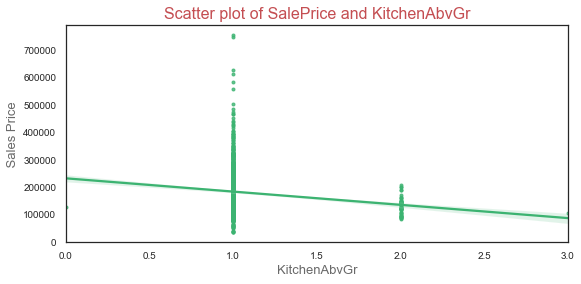

------------------------------------------------------------------------------------------


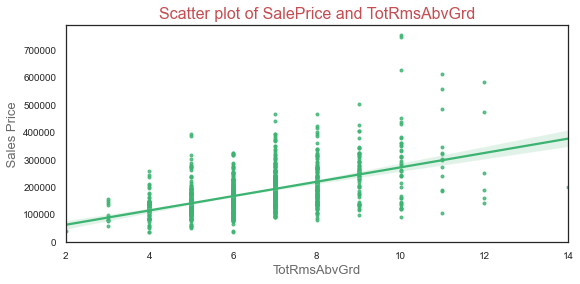

------------------------------------------------------------------------------------------


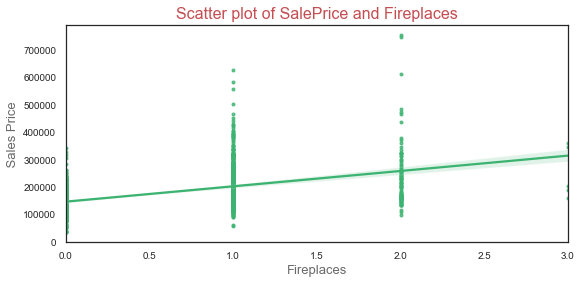

------------------------------------------------------------------------------------------


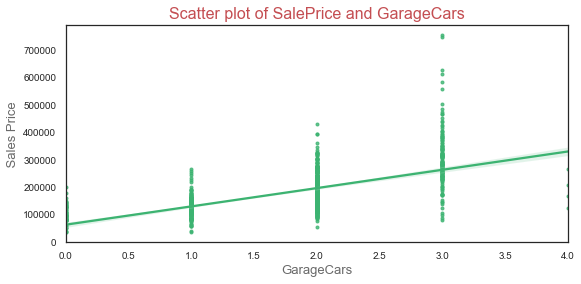

------------------------------------------------------------------------------------------


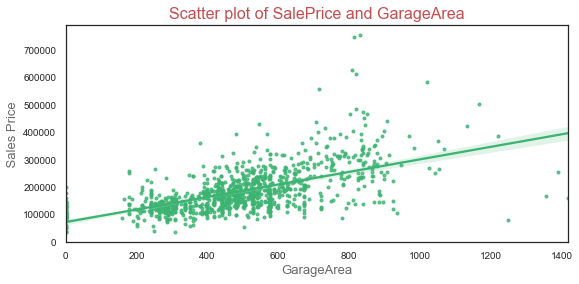

------------------------------------------------------------------------------------------


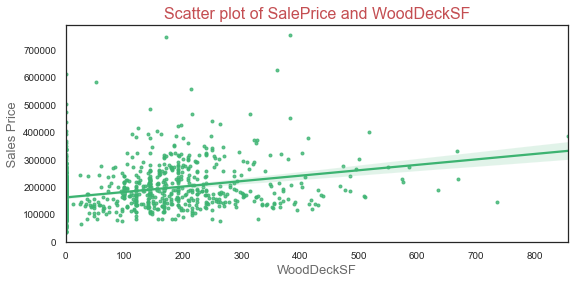

------------------------------------------------------------------------------------------


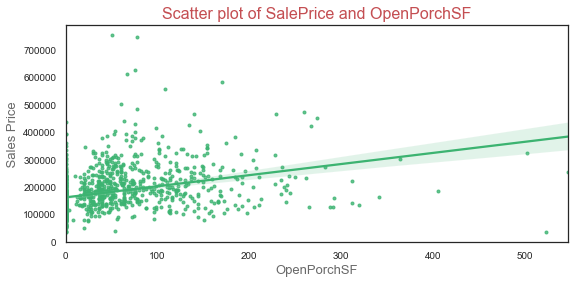

------------------------------------------------------------------------------------------


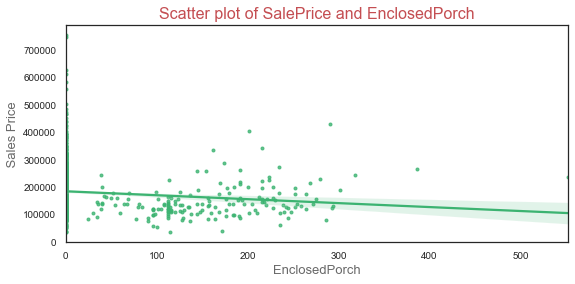

------------------------------------------------------------------------------------------


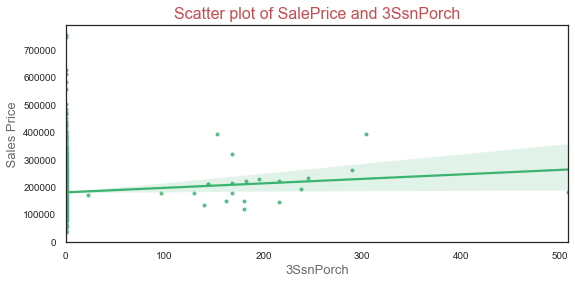

------------------------------------------------------------------------------------------


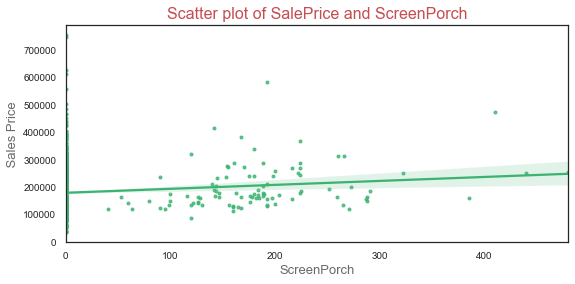

------------------------------------------------------------------------------------------


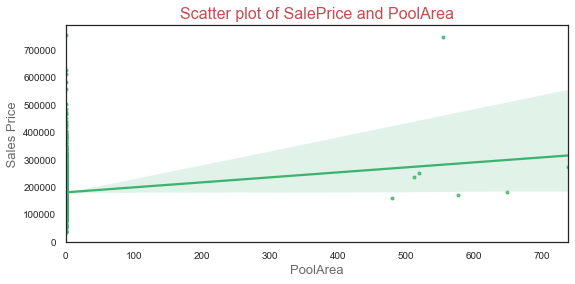

------------------------------------------------------------------------------------------


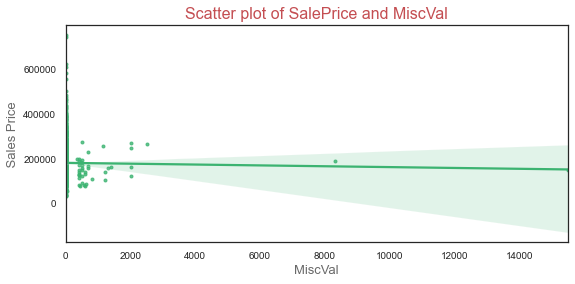

------------------------------------------------------------------------------------------


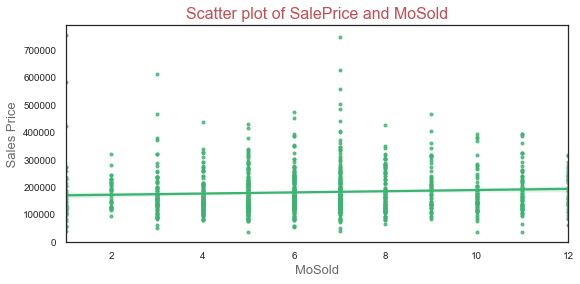

------------------------------------------------------------------------------------------


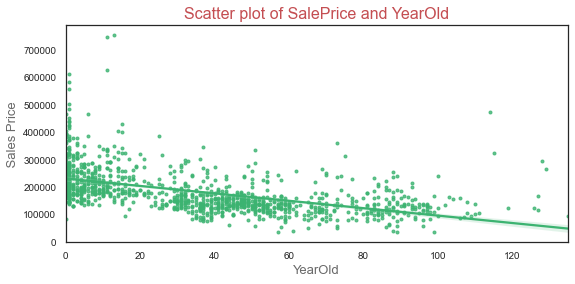

------------------------------------------------------------------------------------------


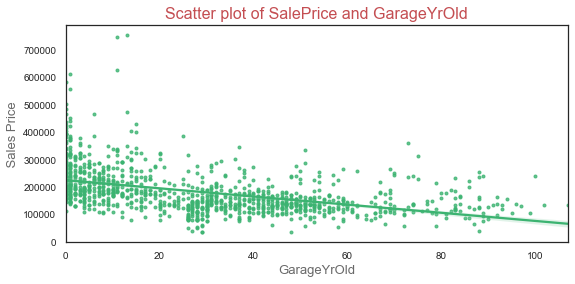

------------------------------------------------------------------------------------------


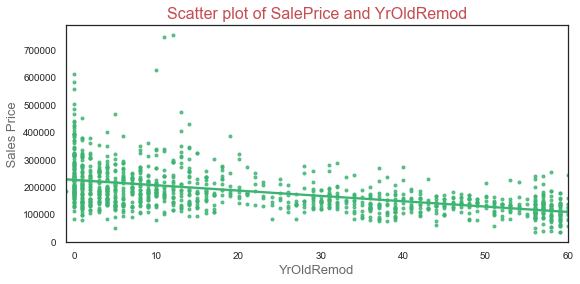

------------------------------------------------------------------------------------------


In [48]:
# calling scatterplot function to plot the graph
scatter_plot(train)

###### Observations:
* Variables like `KitchenAbvGrd ` is the  most indirectly correlated variables with SalePrice.
* We can cleary see that `YearOld, GarageOld, YrOldRemod` time related variabels are somehow showing some negative correltaion with SalePrice which means that as the age of house increase its SalePrice decreses and vice-versa, 
* While `Mosold(Month of house sold year)` showing almost no relation with salePrice which suggests that month of year has no effect on SalePrice but years having effect on SalePrice.

In [49]:
sns.set_style("ticks")

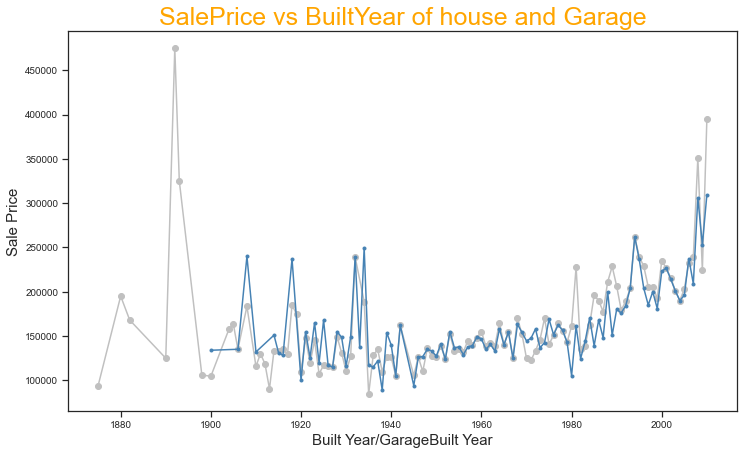

In [50]:
# Average SalePrice in Every Built Year.

#plt.style.use("dark_background")
plt.figure(figsize=(12,7))
plt.plot(train.groupby("YearBuilt")["SalePrice"].median(),marker="o",color='silver')
plt.plot(train.groupby("GarageYrBlt")["SalePrice"].median(),marker=".",color='steelblue')
plt.title("SalePrice vs BuiltYear of house and Garage",fontsize=25,color='orange')
plt.xlabel("Built Year/GarageBuilt Year",fontsize=15)
plt.ylabel("Sale Price",fontsize=15)

plt.show()

###### Observations:
* Silver color of line represents the trend of `SalePrice` on the basis of `YearBuilt`.
* While blue color of line represents the trend of `SalePrice` on the basis of `GarageYrBlt`.
* Both the lines follow almost same trend which suggest that in most of the cases there is not much difference in Year of house and garage built.
* But from trend line it is aslo clear that before 1900 there were no garage built for cars.

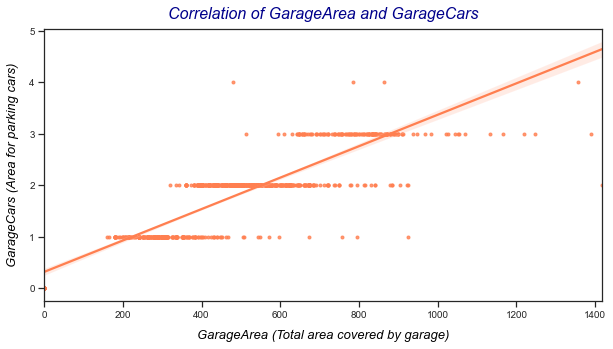

In [51]:
# Plotting the graph between Garage area and Garage Cars to see the type of relation between them

plt.figure(figsize=(10,5))
sns.regplot(x="GarageArea",y="GarageCars",data=train,color='coral',marker='.')
# formats for the title,and labels
ttext = plt.title("Correlation of GarageArea and GarageCars",loc='center',fontsize=16,pad=10)
xtext = plt.xlabel('GarageArea (Total area covered by garage)',labelpad=10)
ytext = plt.ylabel("GarageCars (Area for parking cars)",labelpad=10)
plt.setp(ttext,  color='darkblue', style='italic')
plt.setp(xtext, size='large', color='black', style='italic')
plt.setp(ytext, size='large', color='black', style='italic')
plt.show()

###### Observations:
* GarageArea is the total area covered by garage while GarageCars is the total number of cars can be placed in Garage. As we can see the GarageArea and GarageCars are directly proportional to each other.

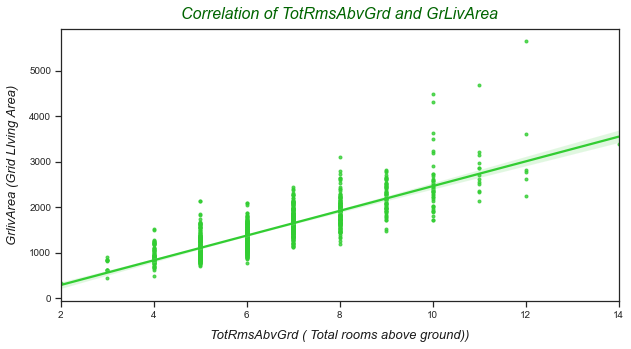

In [52]:
# Plotting the graph to see the correlation of TotalRmsAbvGrd and GridLivArea
plt.figure(figsize=(10,5))
sns.regplot(x="TotRmsAbvGrd",y="GrLivArea",data=train,color='limegreen',marker='.')

ttext = plt.title("Correlation of TotRmsAbvGrd and GrLivArea",loc='center',fontsize=16,pad=10)
ytext = plt.ylabel('GrlivArea (Grid LIving Area)',labelpad=10)
xtext = plt.xlabel("TotRmsAbvGrd ( Total rooms above ground))",labelpad=10)
plt.setp(ttext,  color='darkgreen', style='italic')
plt.setp(xtext, size='large', color='k', style='italic')
plt.setp(ytext, size='large', color='k', style='italic')
plt.show()

###### Observations:
* Regression plot defines that both variables are in direct relationship. If the Gridliving area increases than TotalRmsAbvGrd are also going to increase.
* These direct dependece of variables on each other may cause problem of multicollinearity.

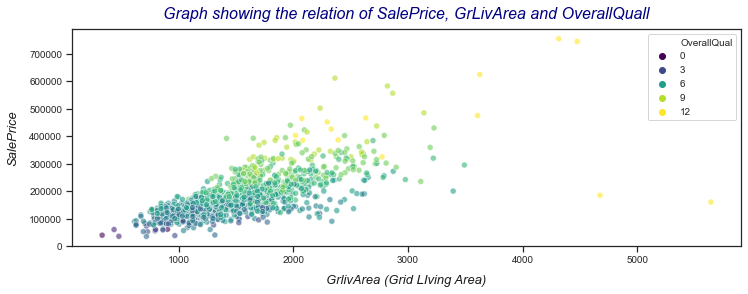

In [53]:
# Multivariate Analysis
plt.figure(figsize=(12,4))
sns.scatterplot(x="GrLivArea",y="SalePrice",hue="OverallQual",data=train,palette='viridis', alpha=.6)

ttext = plt.title("Graph showing the relation of SalePrice, GrLivArea and OverallQuall",loc='center',fontsize=16,pad=10)
xtext = plt.xlabel('GrlivArea (Grid LIving Area)',labelpad=10)
ytext = plt.ylabel("SalePrice",labelpad=10)
plt.setp(ttext,  color='navy', style='italic')
plt.setp(xtext, size='large', color='k', style='italic')
plt.setp(ytext, size='large', color='k', style='italic')
plt.show()

###### Observations:
* Relation of above 3 variables shows that the if the GridLivArea increase and the OverallQuall also increase than the SalePrice of house is also going to increase.
* All of the 3 variables are in direct relationship which means that any cahnge in GridLivArea or OverallQuall is going to change the SalePrice in the same way.
* House with OverallQuall above 6 are having high saleprice.

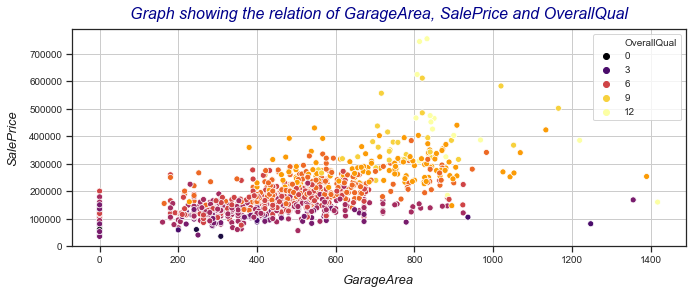

In [54]:
# Multivariate Analysis on GarageArea, SalePrice and OverallQual
plt.figure(figsize=(11,4))
sns.scatterplot(x="GarageArea",y="SalePrice",hue="OverallQual",data=train,palette='inferno')

ttext = plt.title("Graph showing the relation of GarageArea, SalePrice and OverallQual",loc='center',fontsize=16,pad=10)
xtext = plt.xlabel('GarageArea',labelpad=10)
ytext = plt.ylabel("SalePrice",labelpad=10)
plt.setp(ttext,  color='darkblue', style='italic')
plt.setp(xtext, size='large', color='k', style='italic')
plt.setp(ytext, size='large', color='k', style='italic')

plt.yscale('linear')
plt.grid(True)
plt.show()

###### Observations:
* GarageArea and OverallQual aslo having direct relationship with SalePrice.
* Less the GarageArea and low OverallQuall of house, the SalePrice will be less and vice-versa. 

# Dealing with Outliers

In [55]:
# copying data for outliers removal
Out_train=train.copy()

In [56]:
# Now drop both the columns
Out_train.drop(columns=['YearBuilt','YrSold','GarageYrBlt','YearRemodAdd'],axis=1, inplace=True)

In [57]:
# Using Winsorize technique to treat oultiers.
# very handy technique to deal with outliers

def percentile_capping(Out_train, cols, from_low_end, from_high_end):
    for col in cols:
        stats.mstats.winsorize(a=Out_train[col], limits=(from_low_end, from_high_end), inplace=True)

In [58]:
# create a list of variables those having skewness presence
features=['MSSubClass','LotFrontage','LotArea','OverallCond','YearOld',
          'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
          '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath',
          'HalfBath','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
          'GarageYrOld','WoodDeckSF','OpenPorchSF','EnclosedPorch',
          '3SsnPorch','ScreenPorch','PoolArea','MiscVal','YrOldRemod']

In [59]:
# applying function to treat outliers 
percentile_capping(Out_train,features,0.01,0.10)

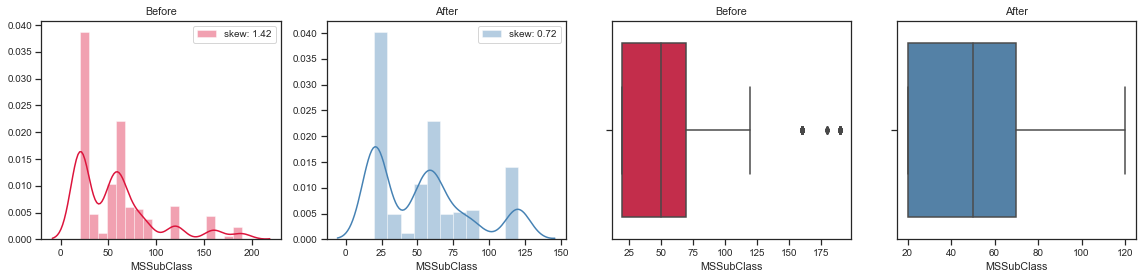

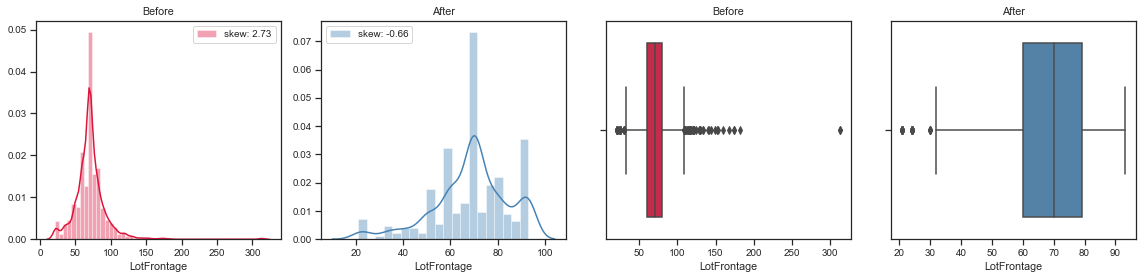

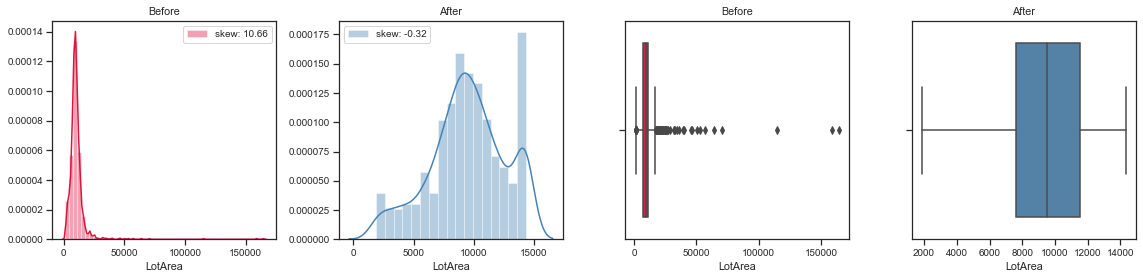

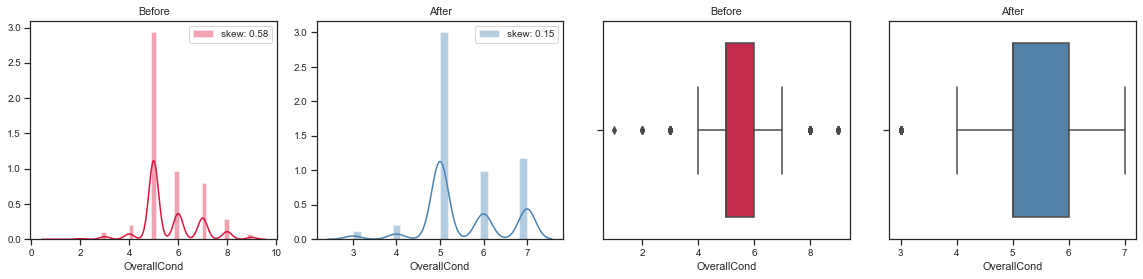

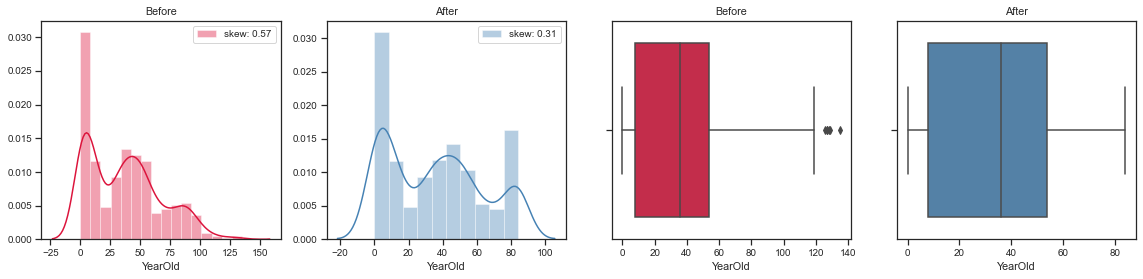

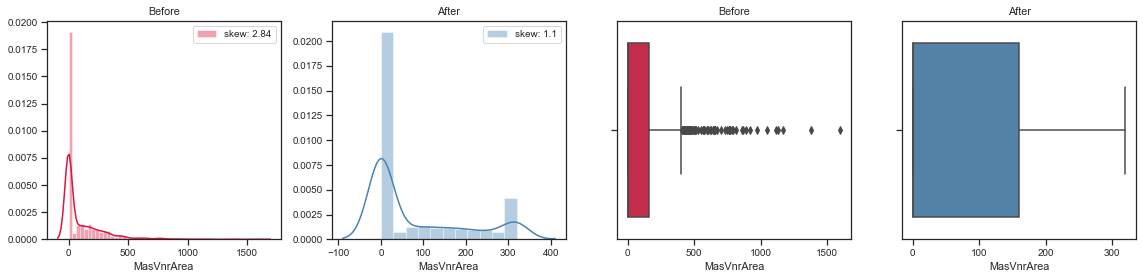

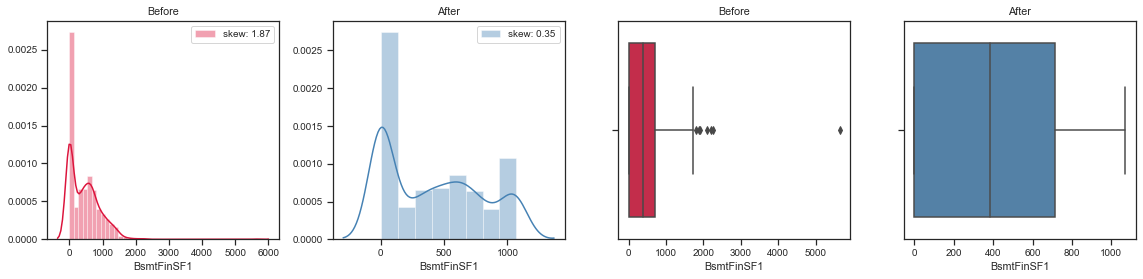

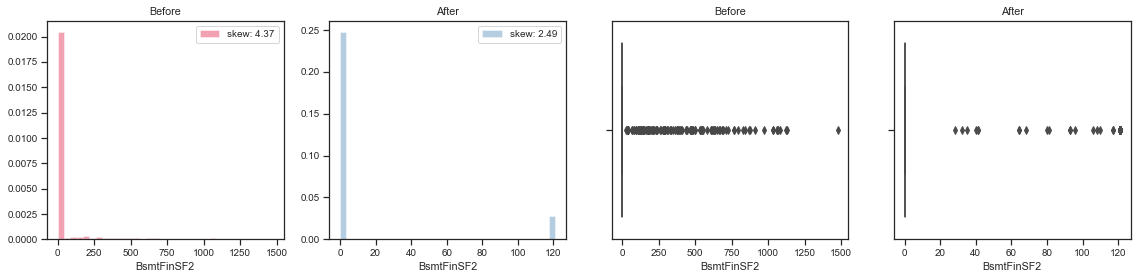

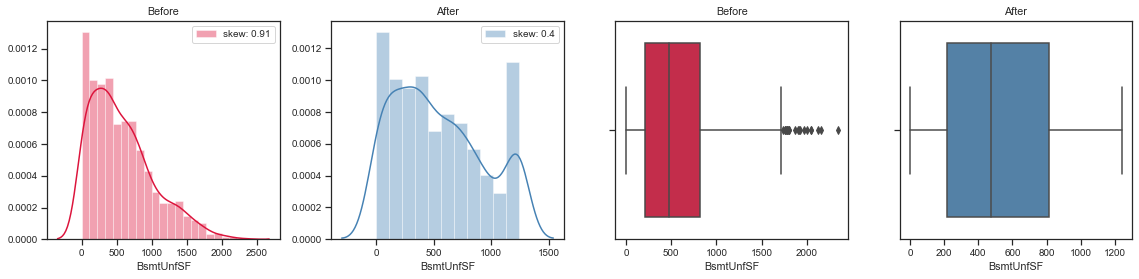

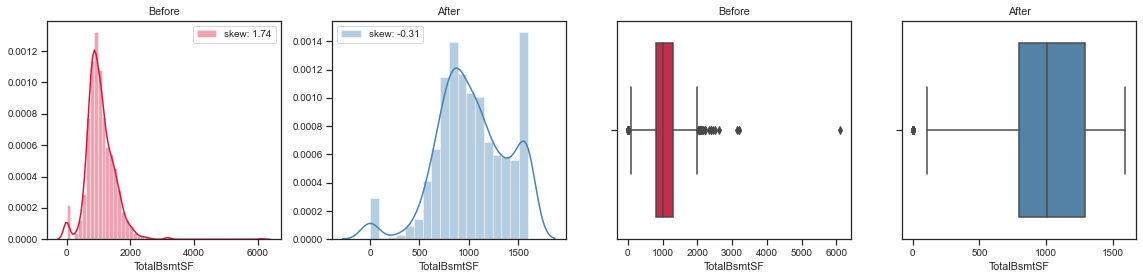

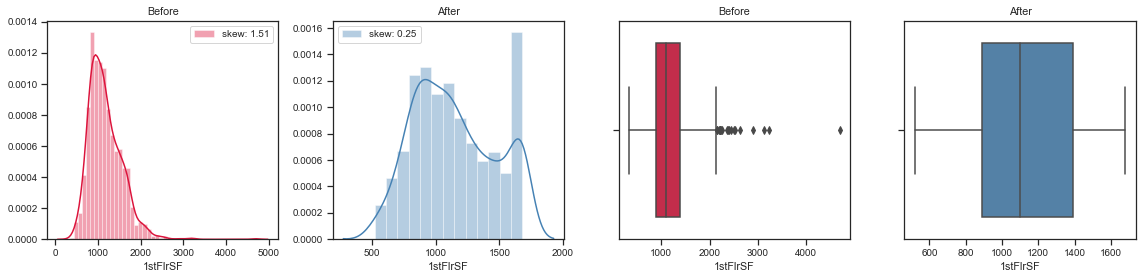

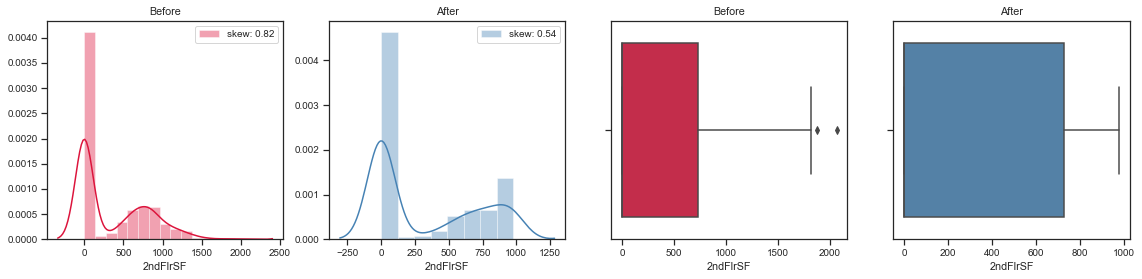

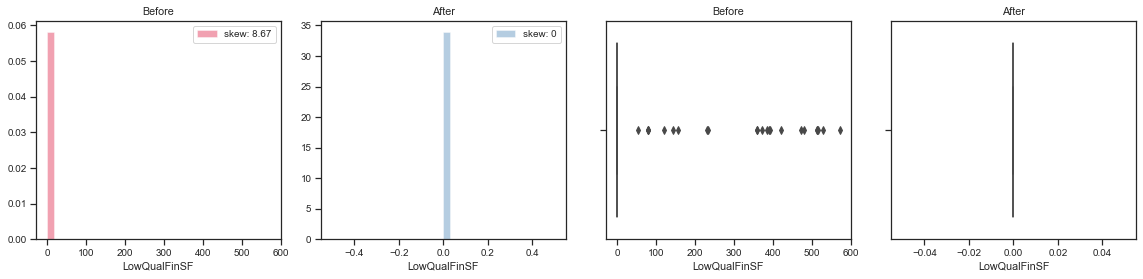

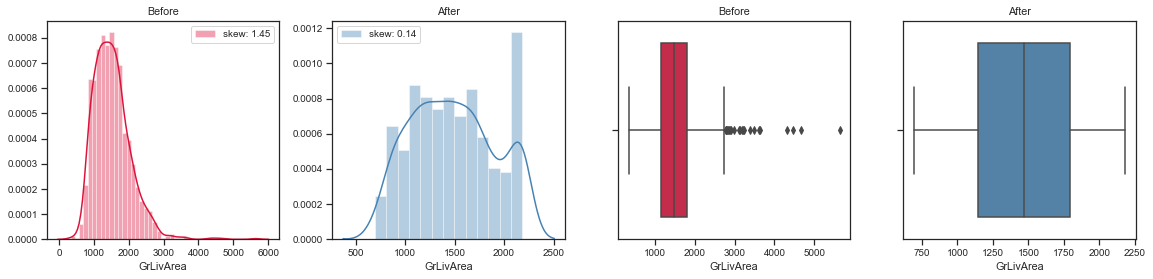

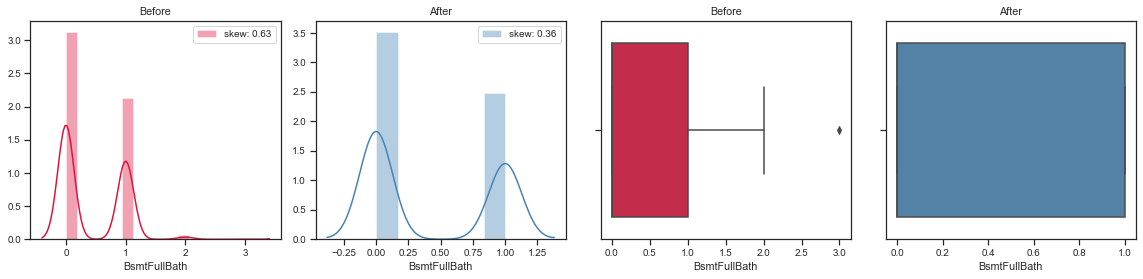

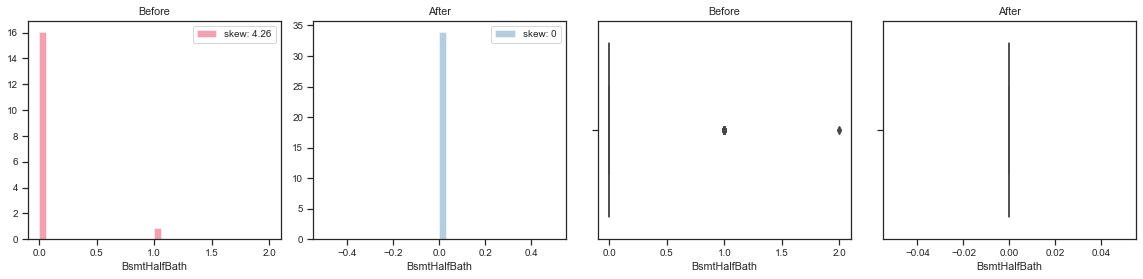

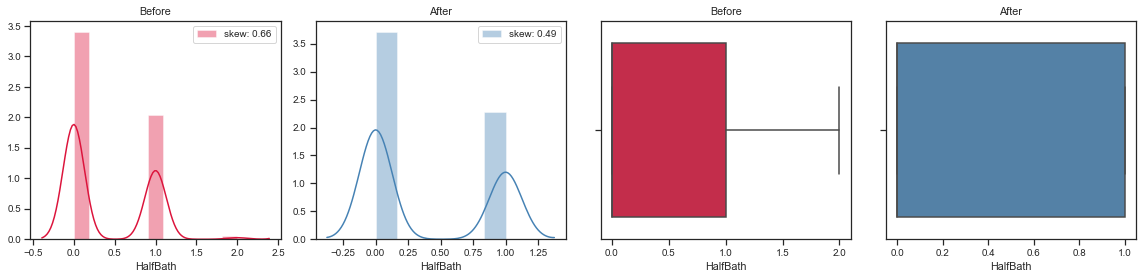

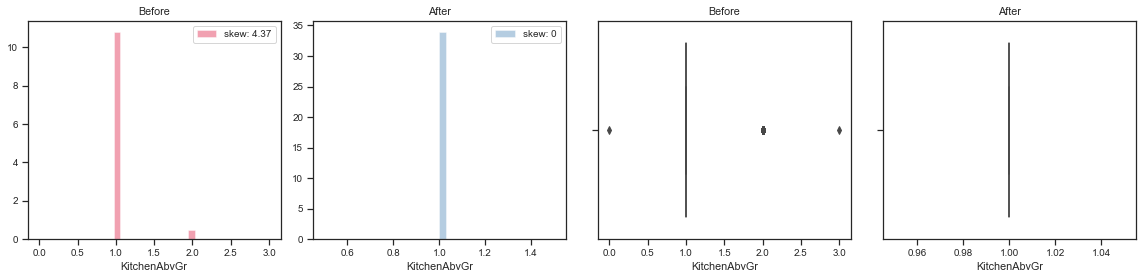

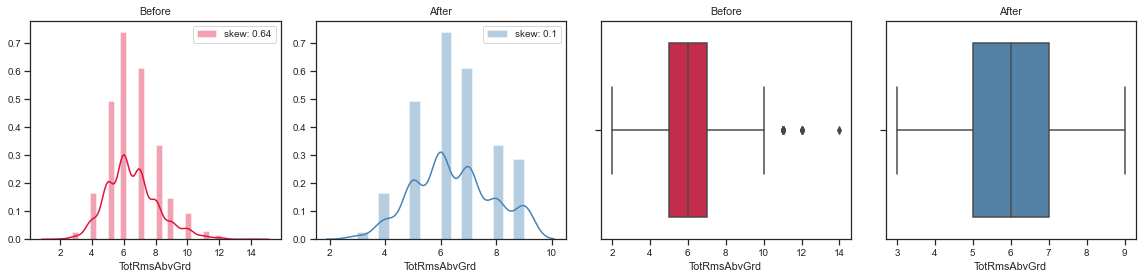

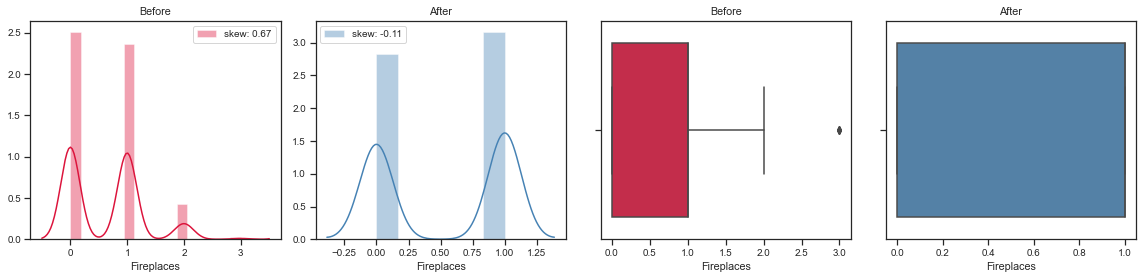

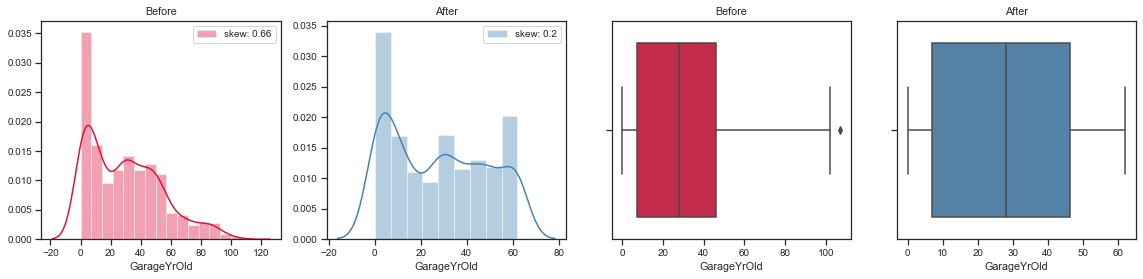

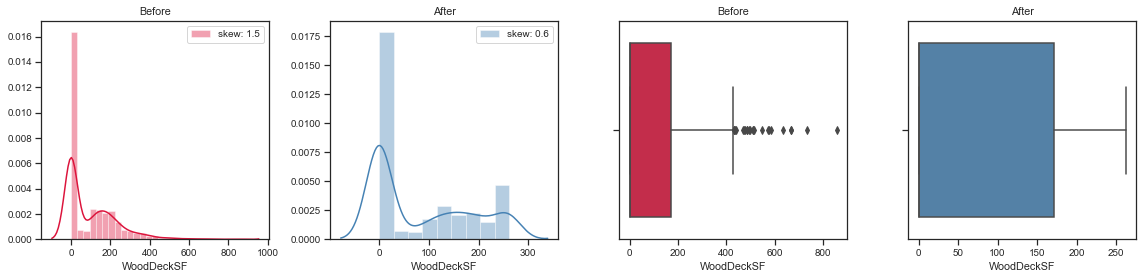

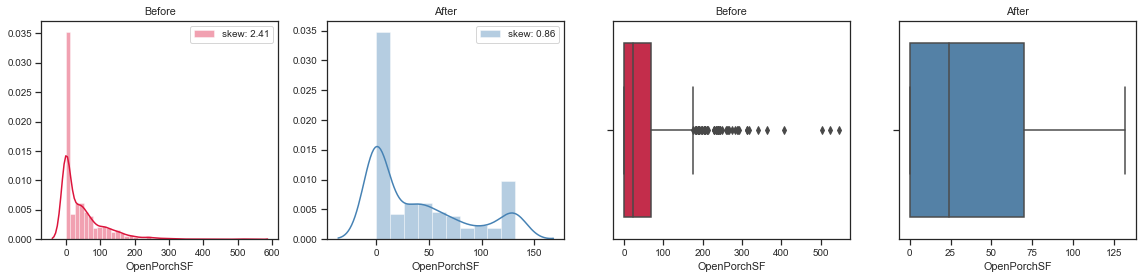

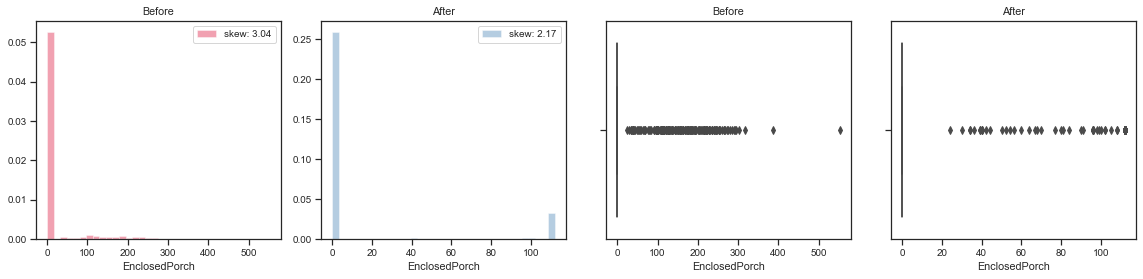

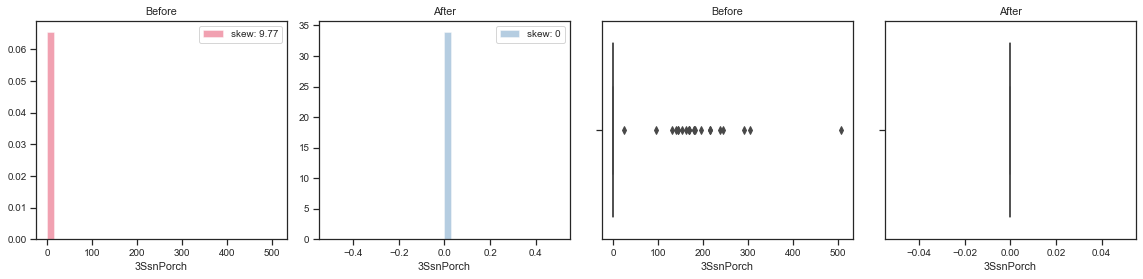

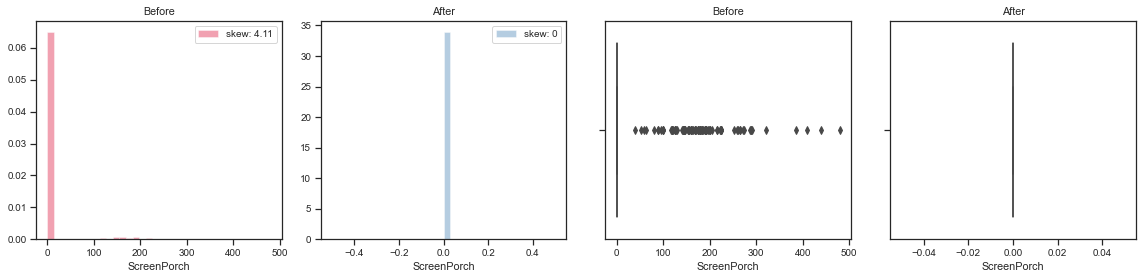

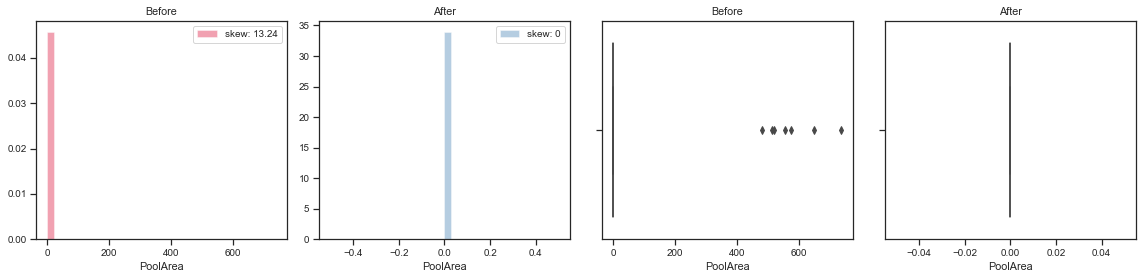

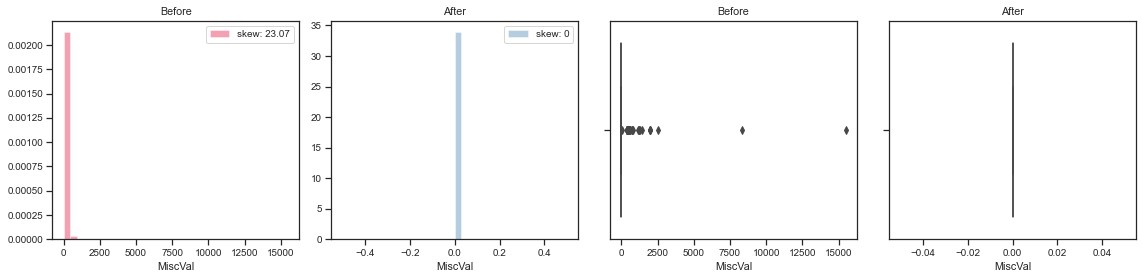

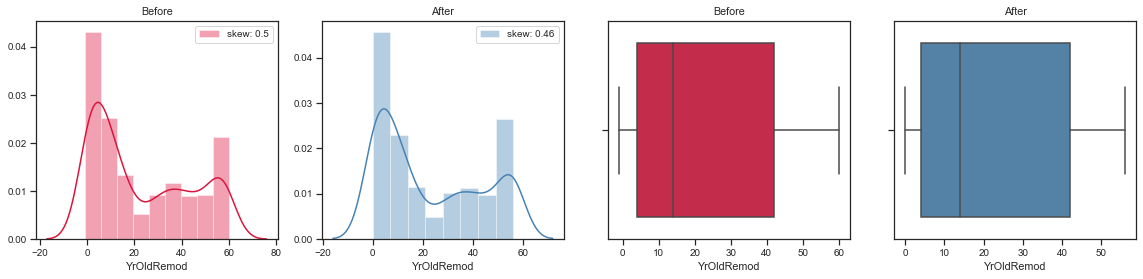

In [60]:
# Let's create historgram and boxplot of variables before and after treating oultiers.
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(train[col], label="skew: " + str(np.round(train[col].skew(),2)),color='crimson')
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(Out_train[col], label="skew: " + str(np.round(Out_train[col].skew(),2)),color='steelblue')
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(train[col],color='crimson')
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(Out_train[col],color='steelblue')
    plt.title('After')
    plt.tight_layout()
    plt.show();

## Let's check skewness

In [61]:
# copy the data
Train=Out_train.copy()

In [62]:
# Now let's check the skewness in our data using function
def skew_values(dataframe):
   
    # creating a dataframe to store the skew values of our dataset
    skewness=pd.DataFrame({"Variables":dataframe.skew().index,"Skewness":dataframe.skew().values})
    # sorting values in descending order
    sorted_data=skewness.sort_values(by="Skewness",ascending=False)
    #Plotting graph
    plt.figure(figsize=(12,7))
    dataframe.skew().sort_values(ascending=False).plot(kind='bar',color='steelblue')
    plt.axhline(y=0.5,color='r',linestyle='--',linewidth=1.2)
    plt.axhline(y=-0.5,color='r',linestyle='--',linewidth=1.2)
    plt.axhline(y=0,color='k',linewidth=1.5)
    return sorted_data

Variables  Skewness
7      BsmtFinSF2  2.488243
26  EnclosedPorch  2.169161
32      SalePrice  1.953878
5      MasVnrArea  1.097189
25    OpenPorchSF  0.859494
0      MSSubClass  0.723703
24     WoodDeckSF  0.597044
11       2ndFlrSF  0.535787
17       HalfBath  0.494488
35     YrOldRemod  0.463517
8       BsmtUnfSF  0.403239
14   BsmtFullBath  0.355224
6      BsmtFinSF1  0.349273
33        YearOld  0.311138
10       1stFlrSF  0.245489
18   BedroomAbvGr  0.243855
31         MoSold  0.220979
34    GarageYrOld  0.200721
23     GarageArea  0.189665
3     OverallQual  0.175082
4     OverallCond  0.153829
13      GrLivArea  0.135647
20   TotRmsAbvGrd  0.097447
16       FullBath  0.057809
15   BsmtHalfBath  0.000000
27      3SsnPorch  0.000000
28    ScreenPorch  0.000000
29       PoolArea  0.000000
30        MiscVal  0.000000
19   KitchenAbvGr  0.000000
12   LowQualFinSF  0.000000
21     Fireplaces -0.113340
9     TotalBsmtSF -0.306956
2         LotArea -0.324189
22     GarageCars -0.358556
1     LotFrontage -0.662019

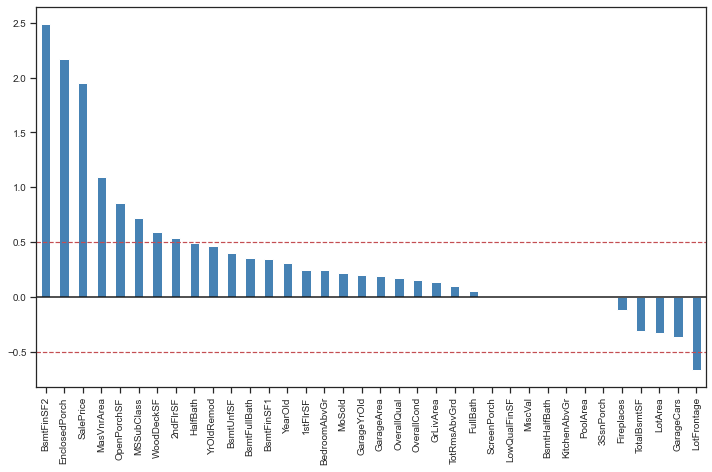

In [63]:
# Calling the function to see the result
skew_values(Train)

In [64]:
Train['EnclosedPorch'] = np.sqrt(Train['EnclosedPorch'])
Train['BsmtFinSF2'] = np.sqrt(Train['BsmtFinSF2'])
Train['MasVnrArea'] = np.sqrt(Train['MasVnrArea'])
Train['OpenPorchSF'] = np.sqrt(Train['OpenPorchSF'])
Train['MSSubClass'] = np.sqrt(Train['MSSubClass'])
Train['WoodDeckSF'] = np.sqrt(Train['WoodDeckSF'])

Variables  Skewness
7      BsmtFinSF2  2.439014
26  EnclosedPorch  2.087622
32      SalePrice  1.953878
5      MasVnrArea  0.710304
11       2ndFlrSF  0.535787
17       HalfBath  0.494488
35     YrOldRemod  0.463517
8       BsmtUnfSF  0.403239
14   BsmtFullBath  0.355224
6      BsmtFinSF1  0.349273
0      MSSubClass  0.338220
33        YearOld  0.311138
24     WoodDeckSF  0.269257
25    OpenPorchSF  0.258906
10       1stFlrSF  0.245489
18   BedroomAbvGr  0.243855
31         MoSold  0.220979
34    GarageYrOld  0.200721
23     GarageArea  0.189665
3     OverallQual  0.175082
4     OverallCond  0.153829
13      GrLivArea  0.135647
20   TotRmsAbvGrd  0.097447
16       FullBath  0.057809
12   LowQualFinSF  0.000000
15   BsmtHalfBath  0.000000
27      3SsnPorch  0.000000
28    ScreenPorch  0.000000
29       PoolArea  0.000000
30        MiscVal  0.000000
19   KitchenAbvGr  0.000000
21     Fireplaces -0.113340
9     TotalBsmtSF -0.306956
2         LotArea -0.324189
22     GarageCars -0.358556
1     LotFrontage -0.662019

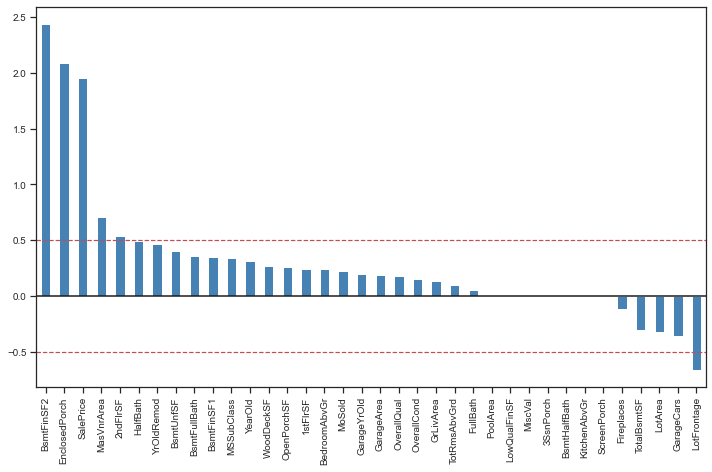

In [65]:
# Calling the function to see the result
skew_values(Train)

###### We can't remove further skewness from the dataset as the columns left with skenwss are having some zero values in it.

## Model Training

In [66]:
# Splitting the dataset into independent and dependent varibales
x = Train.drop(['SalePrice'],axis=1)
y = Train['SalePrice']

print("Splitting successfull.")

Splitting successfull.


In [67]:
print("The Shape of independent variables {} and dependent variable {}.".format(x.shape,y.shape))

The Shape of independent variables (1168, 74) and dependent variable (1168,).


In [68]:
# Now let's encode the categorical columns
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()
for i in x.columns:
    if x[i].dtypes =='object':
        x[i]=label.fit_transform(x[i])
        
print("Dataset successfully encoded.")

Dataset successfully encoded.


In [69]:
# Checking the encoded data
x.head(5)

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0   10.954451         3         70.0     4928       1         0            3   
1    4.472136         3         93.0    14331       1         0            3   
2    7.745967         3         92.0     9920       1         0            3   
3    4.472136         3         93.0    11751       1         0            3   
4    4.472136         3         70.0    14331       1         0            3   

   Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0          0          4          0            13           2           2   
1          0          4          1            12           2           2   
2          0          1          0            15           2           2   
3          0          4          0            14           2           2   
4          0          2          0            14           2           2   

   BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
0         4           2            6            5          1         1   
1         0           2            8            6          0         5   
2         0           5            7            5          1         1   
3         0           2            6            6          3         1   
4         0           2            6            7          1         1   

   Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0            8            9           2    0.000000          3          4   
1           12           13           2    0.000000          2          2   
2            7            7           2    0.000000          2          4   
3            8            9           1   17.888544          3          4   
4            4            4           3   11.224972          2          4   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0           1         2         4             3             0         120   
1           2         4         1             1             0         351   
2           2         2         4             0             2         862   
3           1         2         4             3             1         705   
4           1         2         4             3             0        1071   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  \
0             6         0.0        958         1078        1          4   
1             5        11.0       1043         1595        1          0   
2             6         0.0        255         1117        1          0   
3             6         0.0       1139         1595        1          0   
4             6         0.0        356         1595        1          2   

   CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0           1           4       958         0             0        958   
1           1           4      1680         0             0       2183   
2           1           4      1127       886             0       2013   
3           1           4      1680         0             0       1844   
4           1           4      1602         0             0       1602   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             0         2         0             3             1   

   KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  \
0            3             5           6           1            5           1   
1            2             8           6           1            5           1   
2            3             8           6           1            5   

In [70]:
# scalingg
from sklearn.preprocessing import StandardScaler

scale =StandardScaler()
fit_x=scale.fit(x)

In [71]:
X = fit_x.transform(x)

In [72]:
New_x=pd.DataFrame(X,columns=x.columns)

In [73]:
New_x

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0       1.777324 -0.021646     0.084830 -1.456745  0.058621 -1.373107   
1      -1.094279 -0.021646     1.532654  1.570040  0.058621 -1.373107   
2       0.355996 -0.021646     1.469705  0.150158  0.058621 -1.373107   
3      -1.094279 -0.021646     1.532654  0.739549  0.058621 -1.373107   
4      -1.094279 -0.021646     0.084830  1.570040  0.058621 -1.373107   
...          ...       ...          ...       ...       ...       ...   
1163   -1.094279 -0.021646     0.084830  0.117647  0.058621 -1.373107   
1164   -1.094279 -0.021646    -0.104017 -0.217769  0.058621  0.752055   
1165    1.777324 -0.021646    -2.810818 -2.309125  0.058621  0.752055   
1166    0.630931 -4.762117    -1.174147 -0.306934  0.058621  0.752055   
1167    0.355996 -0.021646     0.084830 -0.512625  0.058621 -1.373107   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0        0.318473        0.0   0.606420  -0.226126      0.142224   -0.037339   
1        0.318473        0.0   0.606420   3.295414     -0.024227   -0.037339   
2        0.318473        0.0  -1.220661  -0.226126      0.475125   -0.037339   
3        0.318473        0.0   0.606420  -0.226126      0.308675   -0.037339   
4        0.318473        0.0  -0.611634  -0.226126      0.308675   -0.037339   
...           ...        ...        ...        ...           ...         ...   
1163     0.318473        0.0   0.606420  -0.226126      1.140927   -0.037339   
1164     0.318473        0.0   0.606420  -0.226126     -0.856479   -1.185010   
1165     0.318473        0.0  -0.611634  -0.226126      0.142224   -0.037339   
1166     0.318473        0.0   0.606420  -0.226126     -0.523578   -1.185010   
1167     0.318473        0.0   0.606420  -0.226126     -0.690029   -0.037339   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  \
0      -0.023979  2.985495   -0.549930    -0.075169    -0.554154  -0.483544   
1      -0.023979 -0.403288   -0.549930     1.364138     0.506915  -1.685203   
2      -0.023979 -0.403288    1.030838     0.644484    -0.554154  -0.483544   
3      -0.023979 -0.403288   -0.549930    -0.075169     0.506915   1.919773   
4      -0.023979 -0.403288   -0.549930    -0.075169     1.567985  -0.483544   
...          ...       ...         ...          ...          ...        ...   
1163   -0.023979 -0.403288   -0.549930    -0.794823    -0.554154  -0.483544   
1164   -0.023979 -0.403288   -0.549930    -1.514476    -0.554154  -0.483544   
1165   -0.023979  2.138299    1.030838    -0.075169     0.506915  -0.483544   
1166   -0.023979 -0.403288    1.030838    -1.514476    -1.615224   0.718115   
1167   -0.023979 -0.403288    1.030838    -0.075169    -0.554154  -0.483544   

      RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0    -0.134573    -0.212927    -0.104890    0.395209   -0.767319   0.671093   
1     6.090408     1.079014     1.050880    0.395209   -0.767319  -0.759266   
2    -0.134573    -0.535912    -0.682775    0.395209   -0.767319  -0.759266   
3    -0.134573    -0.212927    -0.104890   -1.241686    1.747420   0.671093   
4    -0.134573    -1.504868    -1.549602    2.032104    0.810667  -0.759266   
...        ...          ...          ...         ...         ...        ...   
1163 -0.134573    -0.535912    -0.682775   -1.241686    0.015387   0.671093   
1164 -0.134573     0.756029     0.761937    0.395209   -0.767319   0.671093   
1165 -0.134573    -0.212927    -2.127487    0.395209   -0.767319   0.671093   
1166 -0.134573    -1.827853    -1.838545    0.395209   -0.767319   0.671093   
1167 -0.134573     0.756029     0.761937    0.395209   -0.767319  -0.759266   

      ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0      0.369322   -0.557836 -0.570258  0.337121      0.597790     -1.404371   
1     -2.318331    0.852451  1.002496 -2.723166     -1.109347     -1.404371   
2      0.369322    0.852451 -0.57

## Feature Selection

In [74]:
from sklearn.feature_selection import SelectFromModel

In [75]:
selection = SelectFromModel(Lasso(max_iter=10000))
selection.fit(New_x,y)

SelectFromModel(estimator=Lasso(max_iter=10000))

In [76]:
feature_name = New_x.columns[selection.get_support()]
feature_name

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'SaleType', 'SaleCondition', 'YearOld',
       'GarageYrOld', 'YrOld

In [77]:
# Apply transformation on train independent dataset.

selection_New_x = selection.transform(New_x)
New_x = pd.DataFrame(selection_New_x,columns=feature_name)
New_x

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0       1.777324 -0.021646     0.084830 -1.456745  0.058621 -1.373107   
1      -1.094279 -0.021646     1.532654  1.570040  0.058621 -1.373107   
2       0.355996 -0.021646     1.469705  0.150158  0.058621 -1.373107   
3      -1.094279 -0.021646     1.532654  0.739549  0.058621 -1.373107   
4      -1.094279 -0.021646     0.084830  1.570040  0.058621 -1.373107   
...          ...       ...          ...       ...       ...       ...   
1163   -1.094279 -0.021646     0.084830  0.117647  0.058621 -1.373107   
1164   -1.094279 -0.021646    -0.104017 -0.217769  0.058621  0.752055   
1165    1.777324 -0.021646    -2.810818 -2.309125  0.058621  0.752055   
1166    0.630931 -4.762117    -1.174147 -0.306934  0.058621  0.752055   
1167    0.355996 -0.021646     0.084830 -0.512625  0.058621 -1.373107   

      LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0        0.318473   0.606420  -0.226126      0.142224   -0.037339   -0.023979   
1        0.318473   0.606420   3.295414     -0.024227   -0.037339   -0.023979   
2        0.318473  -1.220661  -0.226126      0.475125   -0.037339   -0.023979   
3        0.318473   0.606420  -0.226126      0.308675   -0.037339   -0.023979   
4        0.318473  -0.611634  -0.226126      0.308675   -0.037339   -0.023979   
...           ...        ...        ...           ...         ...         ...   
1163     0.318473   0.606420  -0.226126      1.140927   -0.037339   -0.023979   
1164     0.318473   0.606420  -0.226126     -0.856479   -1.185010   -0.023979   
1165     0.318473  -0.611634  -0.226126      0.142224   -0.037339   -0.023979   
1166     0.318473   0.606420  -0.226126     -0.523578   -1.185010   -0.023979   
1167     0.318473   0.606420  -0.226126     -0.690029   -0.037339   -0.023979   

      BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
0     2.985495   -0.549930    -0.075169    -0.554154  -0.483544 -0.134573   
1    -0.403288   -0.549930     1.364138     0.506915  -1.685203  6.090408   
2    -0.403288    1.030838     0.644484    -0.554154  -0.483544 -0.134573   
3    -0.403288   -0.549930    -0.075169     0.506915   1.919773 -0.134573   
4    -0.403288   -0.549930    -0.075169     1.567985  -0.483544 -0.134573   
...        ...         ...          ...          ...        ...       ...   
1163 -0.403288   -0.549930    -0.794823    -0.554154  -0.483544 -0.134573   
1164 -0.403288   -0.549930    -1.514476    -0.554154  -0.483544 -0.134573   
1165  2.138299    1.030838    -0.075169     0.506915  -0.483544 -0.134573   
1166 -0.403288    1.030838    -1.514476    -1.615224   0.718115 -0.134573   
1167 -0.403288    1.030838    -0.075169    -0.554154  -0.483544 -0.134573   

      Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0       -0.212927    -0.104890    0.395209   -0.767319   0.671093   0.369322   
1        1.079014     1.050880    0.395209   -0.767319  -0.759266  -2.318331   
2       -0.535912    -0.682775    0.395209   -0.767319  -0.759266   0.369322   
3       -0.212927    -0.104890   -1.241686    1.747420   0.671093   0.369322   
4       -1.504868    -1.549602    2.032104    0.810667  -0.759266   0.369322   
...           ...          ...         ...         ...        ...        ...   
1163    -0.535912    -0.682775   -1.241686    0.015387   0.671093  -2.318331   
1164     0.756029     0.761937    0.395209   -0.767319   0.671093   0.369322   
1165    -0.212927    -2.127487    0.395209   -0.767319   0.671093   0.369322   
1166    -1.827853    -1.838545    0.395209   -0.767319   0.671093  -3.662157   
1167     0.756029     0.761937    0.395209   -0.767319  -0.759266   0.369322   

      Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0      -0.557836 -0.570258  0.337121      0.597790     -1.404371   -0.769640   
1       0.852451  1.002496 -2.723166     -1.109347     -1.404371   -0.168811   
2       0.852451 -0.570258  0.

In [78]:
# Let's now find the best random state

max_r_score=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(New_x,y,test_size=0.20,random_state=i)
    lin_reg=LinearRegression()
    lin_reg.fit(x_train,y_train)
    y_pred = lin_reg.predict(x_test)
    R2_score = r2_score(y_test,y_pred)
    
    if R2_score > max_r_score:
        max_r_score = R2_score
        final_random_state = i
print("Max r2 score corresponding to ",final_random_state,"is ",max_r_score,".")

Max r2 score corresponding to  98 is  0.8665932875725469 .


In [79]:
# now lets provide the best random state to the model
x_train,x_test,y_train,y_test=train_test_split(New_x,y,test_size=0.20,random_state=final_random_state)


# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [80]:
# Let's now using different algorithms find the best one for our prediction

def r2score(model):
    
    model.fit(x_train,y_train)
    print('score of',model,'is:',model.score(x_train,y_train))
    y_pred = model.predict(x_test)
    print("Errors:")
    print("Mean absolute error: ",round(mean_absolute_error(y_test,y_pred),3))
    print("Mean squared error: ",round(mean_squared_error(y_test,y_pred),3))
    print("Root mean squared error: ",round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
     # R2 score 
    print("R2 score of ",model,"is ",round(r2_score(y_test,y_pred)*100,2),"%")
    print('\n')

In [81]:
r2score(LinearRegression())

score of LinearRegression() is: 0.8206592458788844
Errors:
Mean absolute error:  20458.536
Mean squared error:  854573603.245
Root mean squared error:  29233.091
R2 score of  LinearRegression() is  86.66 %




In [82]:
r2score(LinearRegression())

score of LinearRegression() is: 0.8206592458788844
Errors:
Mean absolute error:  20458.536
Mean squared error:  854573603.245
Root mean squared error:  29233.091
R2 score of  LinearRegression() is  86.66 %




In [83]:
r2score(DecisionTreeRegressor())

score of DecisionTreeRegressor() is: 1.0
Errors:
Mean absolute error:  31246.239
Mean squared error:  2213252012.812
Root mean squared error:  47045.212
R2 score of  DecisionTreeRegressor() is  65.45 %




In [84]:
r2score(SVR())

score of SVR() is: -0.05112150329299392
Errors:
Mean absolute error:  57186.865
Mean squared error:  6822383840.688
Root mean squared error:  82597.723
R2 score of  SVR() is  -6.5 %




In [85]:
r2score(KNeighborsRegressor())

score of KNeighborsRegressor() is: 0.8236402765920563
Errors:
Mean absolute error:  23206.591
Mean squared error:  1266329075.062
Root mean squared error:  35585.518
R2 score of  KNeighborsRegressor() is  80.23 %




In [86]:
r2score(Lasso())

score of Lasso() is: 0.8206592047349868
Errors:
Mean absolute error:  20456.058
Mean squared error:  854528557.688
Root mean squared error:  29232.32
R2 score of  Lasso() is  86.66 %




In [87]:
parameters = {"alpha":[50,100,150,200,300,400,500,600,700,800,900,1000,10000]}

random_lasso = RandomizedSearchCV(Lasso(),param_distributions=parameters,n_iter=10,n_jobs=-1,verbose=2,cv=3)

random_lasso.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.4s finished


RandomizedSearchCV(cv=3, estimator=Lasso(), n_jobs=-1,
                   param_distributions={'alpha': [50, 100, 150, 200, 300, 400,
                                                  500, 600, 700, 800, 900, 1000,
                                                  10000]},
                   verbose=2)

In [88]:
random_lasso.best_params_

{'alpha': 1000}

In [89]:
random_lasso.best_score_

0.7678030583121075

In [90]:

# prediction on validation data
rdm_lasso_prediction = random_lasso.predict(x_test)
r2_score(y_test,rdm_lasso_prediction)

0.861354216539764

In [91]:
r2score(Ridge())

score of Ridge() is: 0.8206569408129964
Errors:
Mean absolute error:  20434.076
Mean squared error:  853986083.621
Root mean squared error:  29223.04
R2 score of  Ridge() is  86.67 %




In [92]:
parameters = {"alpha":[50,100,150,200,300,400,500,600,700,800,900,1000,10000]}

random_ridge = RandomizedSearchCV(Ridge(),param_distributions=parameters,n_iter=13,n_jobs=-1,verbose=2,cv=3)

random_ridge.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 13 candidates, totalling 39 fits


[Parallel(n_jobs=-1)]: Done  24 out of  39 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    0.1s finished


RandomizedSearchCV(cv=3, estimator=Ridge(), n_iter=13, n_jobs=-1,
                   param_distributions={'alpha': [50, 100, 150, 200, 300, 400,
                                                  500, 600, 700, 800, 900, 1000,
                                                  10000]},
                   verbose=2)

In [93]:
random_ridge.best_estimator_

Ridge(alpha=300)

In [94]:
random_ridge.best_score_

0.7789322886630874

In [95]:
random_ridge_prediction = random_ridge.predict(x_test)
r2_score(y_test,random_ridge_prediction)

0.8672457825727479

In [96]:
r2score(ElasticNet())

score of ElasticNet() is: 0.8041292996716778
Errors:
Mean absolute error:  19418.987
Mean squared error:  885478901.169
Root mean squared error:  29756.998
R2 score of  ElasticNet() is  86.18 %




In [97]:
r2score(AdaBoostRegressor())

score of AdaBoostRegressor() is: 0.8602395771256093
Errors:
Mean absolute error:  26559.128
Mean squared error:  1164968542.795
Root mean squared error:  34131.636
R2 score of  AdaBoostRegressor() is  81.81 %




In [98]:
r2score(RandomForestRegressor())

score of RandomForestRegressor() is: 0.9784534406162063
Errors:
Mean absolute error:  18775.595
Mean squared error:  789645903.922
Root mean squared error:  28100.639
R2 score of  RandomForestRegressor() is  87.67 %




In [99]:
# Let's check GradientBoosting Regression Algorithm
r2score(GradientBoostingRegressor())

score of GradientBoostingRegressor() is: 0.9680132408487385
Errors:
Mean absolute error:  17154.276
Mean squared error:  673381559.981
Root mean squared error:  25949.597
R2 score of  GradientBoostingRegressor() is  89.49 %




In [100]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    score=cross_val_score(GradientBoostingRegressor(),New_x,y,cv=i)
    
    print("Score at ",i,"is",score.mean())
    print(score.std())

Score at  2 is 0.8416350700288251
0.003231091211818471
Score at  3 is 0.8660524928810206
0.005633841458293547
Score at  4 is 0.8502753654402412
0.034517336565556764
Score at  5 is 0.8543653465549772
0.04152840537487147
Score at  6 is 0.853444321814039
0.04084178703300587
Score at  7 is 0.84552561690312
0.08003905659304757
Score at  8 is 0.8520442490818075
0.049781423287271996
Score at  9 is 0.8517020095346234
0.0697969845174656


In [101]:
# Hyyperparmeter tunning for Gradient Boosting Regression Algorithm
param_grid = { 
    'n_estimators': [40,60,80,100,200,300,400,500,600],
    'max_depth' : [4,5,6,7,8,10,12,14,16],
    'learning_rate':[1.0,0.7,0.5,0.4,0.3,0.2,0.1,0.01,0.001]
}
random_gradient = RandomizedSearchCV(estimator= GradientBoostingRegressor(), param_distributions=param_grid,cv= 3,verbose=2, n_jobs=-1,n_iter=20)
random_gradient.fit(x_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   42.2s finished


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [1.0, 0.7, 0.5, 0.4,
                                                          0.3, 0.2, 0.1, 0.01,
                                                          0.001],
                                        'max_depth': [4, 5, 6, 7, 8, 10, 12, 14,
                                                      16],
                                        'n_estimators': [40, 60, 80, 100, 200,
                                                         300, 400, 500, 600]},
                   verbose=2)

In [102]:
random_gradient.best_params_

{'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.3}

In [103]:
random_gradient.best_score_

0.8088919282130359

In [104]:
random_gradient_prediction = random_gradient.predict(x_test)
r2_score(y_test,random_gradient_prediction)

0.8913205092235597

In [105]:
print("Mean absolute error :",mean_absolute_error(y_test,random_gradient_prediction))
print("Mean squared error :",mean_squared_error(y_test,random_gradient_prediction))
print("Root mean squared error :",np.sqrt(mean_squared_error(y_test,random_gradient_prediction)))


Mean absolute error : 18522.589947898283
Mean squared error : 696176544.206169
Root mean squared error : 26385.157649825953


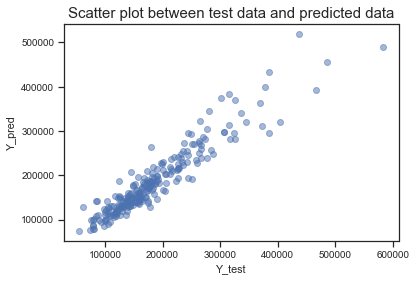

In [106]:
plt.scatter(y_test,random_gradient_prediction, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Scatter plot between test data and predicted data",fontsize=15)
plt.show()

In [108]:
# Saving the model
import joblib
joblib.dump(random_gradient,"gradient_reg.obj")

['gradient_reg.obj']

## Loading Test Dataset

In [109]:
# Loading test dataset
df_test = pd.read_csv('test.csv')

# Display first 5 rows
df_test.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

In [110]:
# Checking the shape of dataset
shape(df_test)

This dataset contains rows 292 and columns 80.


In [111]:
# Let's check data information
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

NUll values :
LotFrontage  - 15.41 %.
Alley  - 95.21 %.
MasVnrType  - 0.34 %.
MasVnrArea  - 0.34 %.
BsmtQual  - 2.4 %.
BsmtCond  - 2.4 %.
BsmtExposure  - 2.4 %.
BsmtFinType1  - 2.4 %.
BsmtFinType2  - 2.4 %.
Electrical  - 0.34 %.
FireplaceQu  - 47.6 %.
GarageType  - 5.82 %.
GarageYrBlt  - 5.82 %.
GarageFinish  - 5.82 %.
GarageQual  - 5.82 %.
GarageCond  - 5.82 %.
PoolQC  - 100.0 %.
Fence  - 84.93 %.
MiscFeature  - 96.58 %.


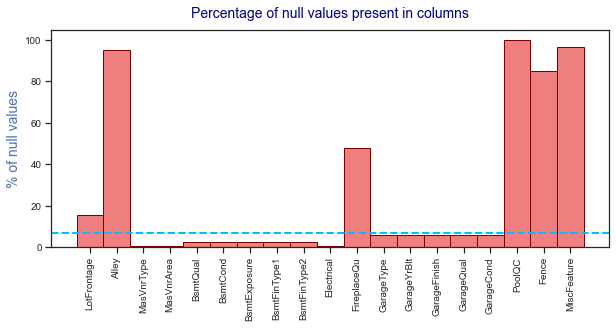

In [112]:
# let's check null values in test dataset
null_values(df_test)

In [113]:
# Copying data
test = df_test.copy()

In [114]:
# dropping unnecessary column
test.drop(columns="Id",axis=1,inplace=True)

In [115]:
# dropping columns with too much of null values 
test.drop(columns=['Alley','PoolQC','MiscFeature','Fence'],axis=1,inplace=True)

In [116]:
# filling null values in fireplaceQu
test['FireplaceQu']=test['FireplaceQu'].fillna("No fireplace")

# filling null values in LotFrontage
# median values gives better match for null values so fillingg null values with median values
test['LotFrontage'].fillna(test['LotFrontage'].median(),inplace=True)

# filling null values in MasVnrType 
test['MasVnrType'].fillna("None",inplace=True)

# filling null values in MasVnrArea  
test['MasVnrArea'].fillna(test['MasVnrArea'].median(),inplace=True)

# filling null values in BsmtQual   
test['BsmtQual'].fillna("No Basement",inplace=True)

# filling null values in BsmtCond     
test['BsmtCond'].fillna("No Basement",inplace=True)

# filling null values in BsmtExposure    
test['BsmtExposure'].fillna("No Basement",inplace=True)

# filling null values in BsmtFinType1     
test['BsmtFinType1'].fillna("No Basement",inplace=True)

# filling null values in BsmtFinType2      
test['BsmtFinType2'].fillna("No Basement",inplace=True)

# filling null values in GarageType      
test['GarageType'].fillna("No Garage",inplace=True)

# filling null values in GarageYrBlt       
test['GarageYrBlt'].fillna(test['GarageYrBlt'].median(),inplace=True)

# filling null values in GarageFinish       
test['GarageFinish'].fillna("No Garage",inplace=True)

# filling null values in GarageQual       
test['GarageQual'].fillna("No Garage",inplace=True)

# filling null values in GarageCond        
test['GarageCond'].fillna("No Garage",inplace=True)

# filling null values in Electrical
test['Electrical'].fillna("SBrkr",inplace=True)

In [117]:
# Let's add a new column containing the difference of YearBuilt and YrSold.
test['YearOld'] = test['YrSold'] - test['YearBuilt']
test['GarageYrOld'] = test['YrSold'] - test['GarageYrBlt']
test['YrOldRemod'] = test['YrSold'] - test['YearRemodAdd']

# Now drop both the columns
test.drop(columns=['YearBuilt','YrSold','GarageYrBlt','YearRemodAdd'],axis=1, inplace=True)

NUll values :


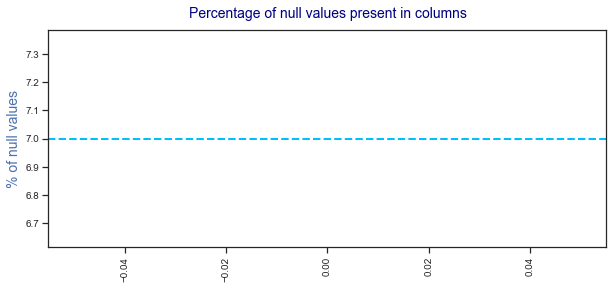

In [118]:
null_values(test)

## Removing Outliers

In [119]:
# Calling the outlier treating function
percentile_capping(test,features,0.01,0.1)

Variables  Skewness
7      BsmtFinSF2  2.571393
26  EnclosedPorch  2.386042
5      MasVnrArea  1.046491
24     WoodDeckSF  0.792587
0      MSSubClass  0.755003
25    OpenPorchSF  0.731460
17       HalfBath  0.619568
4     OverallCond  0.512017
34     YrOldRemod  0.499511
11       2ndFlrSF  0.471164
32        YearOld  0.401335
3     OverallQual  0.397312
6      BsmtFinSF1  0.375952
10       1stFlrSF  0.357666
14   BsmtFullBath  0.335025
31         MoSold  0.186504
33    GarageYrOld  0.177909
8       BsmtUnfSF  0.167975
23     GarageArea  0.133547
18   BedroomAbvGr  0.075315
12   LowQualFinSF  0.000000
28    ScreenPorch  0.000000
15   BsmtHalfBath  0.000000
19   KitchenAbvGr  0.000000
30        MiscVal  0.000000
29       PoolArea  0.000000
27      3SsnPorch  0.000000
16       FullBath -0.049800
13      GrLivArea -0.073321
21     Fireplaces -0.096497
9     TotalBsmtSF -0.103879
2         LotArea -0.259165
20   TotRmsAbvGrd -0.274208
22     GarageCars -0.280324
1     LotFrontage -0.539600

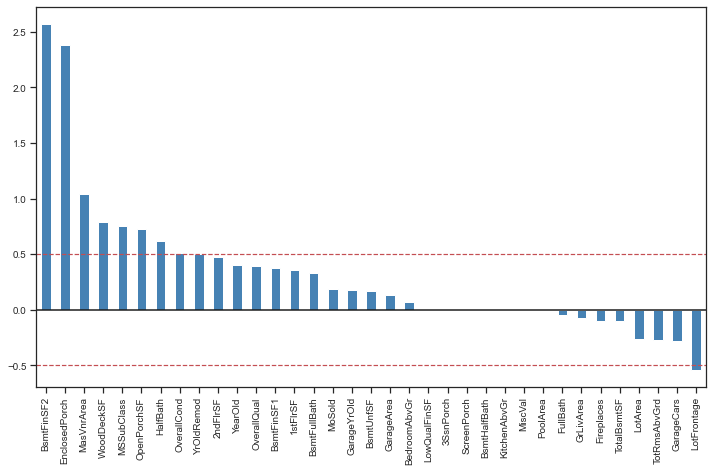

In [120]:
skew_values(test)

In [121]:
# Dropping high skewed columns

## Label encoding

In [122]:
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()
for i in test.columns:
    if test[i].dtypes =='object':
        test[i]=label.fit_transform(test[i])

In [123]:
test.shape

(292, 74)

In [124]:
test.head(5)

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          20         2         86.0    14157       1         0            1   
1         120         2         65.0     5814       1         0            3   
2          20         2         65.0    11838       1         3            3   
3          70         2         75.0    12000       1         3            0   
4          60         2         86.0    14587       1         0            3   

   Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0          0          0          0            21           2           0   
1          0          1          0            21           2           0   
2          0          4          0             4           2           0   
3          0          4          0             5           2           0   
4          0          1          0            20           1           0   

   BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
0         0           2            9            5          3         0   
1         4           2            8            5          1         0   
2         0           2            8            5          3         0   
3         0           5            7            7          1         0   
4         0           5            6            5          1         0   

   Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0            9           11           3       200.0          2          3   
1            5            5           2         0.0          2          3   
2            9           11           2         0.0          2          3   
3            6            7           2         0.0          3          3   
4            9           11           3        74.0          2          3   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0           2         0         3             1             2        1056   
1           1         2         3             0             2        1036   
2           2         2         3             0             6           0   
3           1         4         3             3             5         275   
4           2         2         3             2             6           0   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  \
0             6           0        673         1626        0          0   
1             6           0        184         1220        0          2   
2             6           0       1048         1626        0          0   
3             6           0        429          704        0          0   
4             6           0        894          894        0          0   

   CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0           1           3      1687         0             0       1922   
1           1           3      1360         0             0       1360   
2           1           3      1687         0             0       1788   
3           1           3       860       704             0       1564   
4           1           3       894       896             0       1933   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         0             3             1   
1             1             0         1         0             1             1   
2             0             0         2         0             3             1   
3             0             0         1         1             3             1   
4             0             0         2         1             4             1   

   KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  \
0            2             8           5           1            2           1   
1            2             4           5           1            0           1   
2            0             7           5           1            5   

In [125]:
test_data=fit_x.transform(test)

In [126]:
# Scaling test dataa

scaled_test = pd.DataFrame(test_data,columns=test.columns)

In [127]:
scaled_test

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0      5.784414 -1.601803     1.092012  1.514030  0.058621 -1.373107   
1     50.083439 -1.601803    -0.229914 -1.171546  0.058621 -1.373107   
2      5.784414 -1.601803    -0.229914  0.767554  0.058621  0.752055   
3     27.933926 -1.601803     0.399574  0.819701  0.058621  0.752055   
4     23.504024 -1.601803     1.092012  1.652445  0.058621 -1.373107   
..          ...       ...          ...       ...       ...       ...   
287    5.784414 -1.601803     0.588421  0.242220  0.058621  0.752055   
288    5.784414 -1.601803    -0.733505 -0.067122  0.058621 -0.664720   
289    5.784414 -1.601803    -0.229914  0.575382  0.058621 -1.373107   
290   19.074121 -0.021646    -1.174147 -1.433569  0.058621  0.752055   
291   50.083439 -0.021646    -2.999665 -2.414385  0.058621  0.752055   

     LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0      -2.499530        0.0  -1.829688  -0.226126      1.473828   -0.037339   
1       0.318473        0.0  -1.220661  -0.226126      1.473828   -0.037339   
2       0.318473        0.0   0.606420  -0.226126     -1.355831   -0.037339   
3      -3.908531        0.0   0.606420  -0.226126     -1.189380   -0.037339   
4       0.318473        0.0  -1.220661  -0.226126      1.307378   -1.185010   
..           ...        ...        ...        ...           ...         ...   
287     0.318473        0.0   0.606420  -0.226126      1.307378   -0.037339   
288     0.318473        0.0   0.606420  -0.226126     -1.355831   -0.037339   
289     0.318473        0.0  -1.220661  -0.226126     -0.190677   -0.037339   
290     0.318473        0.0  -1.829688  -0.226126     -1.688732   -1.185010   
291     0.318473        0.0   0.606420  -0.226126     -1.855183   -0.037339   

     Condition2  BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  \
0     -8.026279 -0.403288   -0.549930     2.083791    -0.554154   1.919773   
1     -8.026279  2.985495   -0.549930     1.364138    -0.554154  -0.483544   
2     -8.026279 -0.403288   -0.549930     1.364138    -0.554154   1.919773   
3     -8.026279 -0.403288    1.030838     0.644484     1.567985  -0.483544   
4     -8.026279 -0.403288    1.030838    -0.075169    -0.554154  -0.483544   
..          ...       ...         ...          ...          ...        ...   
287   -8.026279 -0.403288   -0.549930     1.364138    -0.554154  -0.483544   
288   -8.026279 -0.403288   -0.549930    -0.794823    -0.554154  -0.483544   
289   -8.026279 -0.403288   -0.549930    -0.075169     1.567985  -0.483544   
290   -8.026279 -0.403288   -1.603776    -0.075169     1.567985  -0.483544   
291   -8.026279  2.138299    1.030838    -0.075169    -0.554154  -0.483544   

     RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0   -1.690818     0.110058     0.472995    2.032104   27.348321  -0.759266   
1   -1.690818    -1.181882    -1.260660    0.395209   -0.767319  -0.759266   
2   -1.690818     0.110058     0.472995    0.395209   -0.767319  -0.759266   
3   -1.690818    -0.858897    -0.682775    0.395209   -0.767319   0.671093   
4   -1.690818     0.110058     0.472995    2.032104    9.635468  -0.759266   
..        ...          ...          ...         ...         ...        ...   
287 -1.690818     0.110058     0.472995    2.032104   49.700255   0.671093   
288 -1.690818     0.110058     0.472995    0.395209   -0.767319   0.671093   
289 -1.690818     0.433043     0.761937   -1.241686   24.536757   0.671093   
290 -1.690818    -1.504868    -1.549602    0.395209   -0.767319   0.671093   
291 -1.690818    -1.181882    -1.260660   -1.241686   49.700255   0.671093   

     ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0    -0.974504    0.852451 -2.143012 -0.682975     -1.109347     -0.516039   
1    -0.974504   -0.557836 -0.570258 -0.682975     -1.962915     -0.516039   
2    -0.974504    0.852451 -0.570258 -0.682975     -1.962915      1.260625   
3    

#### Feature Selection

In [128]:
# Apply transformation on train independent dataset.

feature_name = test.columns[selection.get_support()]
feature_name

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'SaleType', 'SaleCondition', 'YearOld',
       'GarageYrOld', 'YrOld

In [129]:
selection_New_test= selection.transform(test_data)
New_test = pd.DataFrame(selection_New_test,columns=feature_name)
New_test

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0      5.784414 -1.601803     1.092012  1.514030  0.058621 -1.373107   
1     50.083439 -1.601803    -0.229914 -1.171546  0.058621 -1.373107   
2      5.784414 -1.601803    -0.229914  0.767554  0.058621  0.752055   
3     27.933926 -1.601803     0.399574  0.819701  0.058621  0.752055   
4     23.504024 -1.601803     1.092012  1.652445  0.058621 -1.373107   
..          ...       ...          ...       ...       ...       ...   
287    5.784414 -1.601803     0.588421  0.242220  0.058621  0.752055   
288    5.784414 -1.601803    -0.733505 -0.067122  0.058621 -0.664720   
289    5.784414 -1.601803    -0.229914  0.575382  0.058621 -1.373107   
290   19.074121 -0.021646    -1.174147 -1.433569  0.058621  0.752055   
291   50.083439 -0.021646    -2.999665 -2.414385  0.058621  0.752055   

     LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0      -2.499530  -1.829688  -0.226126      1.473828   -0.037339   -8.026279   
1       0.318473  -1.220661  -0.226126      1.473828   -0.037339   -8.026279   
2       0.318473   0.606420  -0.226126     -1.355831   -0.037339   -8.026279   
3      -3.908531   0.606420  -0.226126     -1.189380   -0.037339   -8.026279   
4       0.318473  -1.220661  -0.226126      1.307378   -1.185010   -8.026279   
..           ...        ...        ...           ...         ...         ...   
287     0.318473   0.606420  -0.226126      1.307378   -0.037339   -8.026279   
288     0.318473   0.606420  -0.226126     -1.355831   -0.037339   -8.026279   
289     0.318473  -1.220661  -0.226126     -0.190677   -0.037339   -8.026279   
290     0.318473  -1.829688  -0.226126     -1.688732   -1.185010   -8.026279   
291     0.318473   0.606420  -0.226126     -1.855183   -0.037339   -8.026279   

     BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
0   -0.403288   -0.549930     2.083791    -0.554154   1.919773 -1.690818   
1    2.985495   -0.549930     1.364138    -0.554154  -0.483544 -1.690818   
2   -0.403288   -0.549930     1.364138    -0.554154   1.919773 -1.690818   
3   -0.403288    1.030838     0.644484     1.567985  -0.483544 -1.690818   
4   -0.403288    1.030838    -0.075169    -0.554154  -0.483544 -1.690818   
..        ...         ...          ...          ...        ...       ...   
287 -0.403288   -0.549930     1.364138    -0.554154  -0.483544 -1.690818   
288 -0.403288   -0.549930    -0.794823    -0.554154  -0.483544 -1.690818   
289 -0.403288   -0.549930    -0.075169     1.567985  -0.483544 -1.690818   
290 -0.403288   -1.603776    -0.075169     1.567985  -0.483544 -1.690818   
291  2.138299    1.030838    -0.075169    -0.554154  -0.483544 -1.690818   

     Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0       0.110058     0.472995    2.032104   27.348321  -0.759266  -0.974504   
1      -1.181882    -1.260660    0.395209   -0.767319  -0.759266  -0.974504   
2       0.110058     0.472995    0.395209   -0.767319  -0.759266  -0.974504   
3      -0.858897    -0.682775    0.395209   -0.767319   0.671093  -0.974504   
4       0.110058     0.472995    2.032104    9.635468  -0.759266  -0.974504   
..           ...          ...         ...         ...        ...        ...   
287     0.110058     0.472995    2.032104   49.700255   0.671093  -0.974504   
288     0.110058     0.472995    0.395209   -0.767319   0.671093  -0.974504   
289     0.433043     0.761937   -1.241686   24.536757   0.671093  -0.974504   
290    -1.504868    -1.549602    0.395209   -0.767319   0.671093  -2.318331   
291    -1.181882    -1.260660   -1.241686   49.700255   0.671093  -0.974504   

     Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0      0.852451 -2.143012 -0.682975     -1.109347     -0.516039    1.664889   
1     -0.557836 -0.570258 -0.682975     -1.962915     -0.516039    1.612869   
2      0.852451 -0.570258 -0.682975     -1.962915      1.260625   -1.081759   
3

In [130]:
# Load our model
housing_model = joblib.load('gradient_reg.obj')
housing_model

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [1.0, 0.7, 0.5, 0.4,
                                                          0.3, 0.2, 0.1, 0.01,
                                                          0.001],
                                        'max_depth': [4, 5, 6, 7, 8, 10, 12, 14,
                                                      16],
                                        'n_estimators': [40, 60, 80, 100, 200,
                                                         300, 400, 500, 600]},
                   verbose=2)

In [131]:
housing_model.predict(New_test)

array([417523.7976599 , 223202.59733069, 228984.25066965, 183713.89664   ,
       192913.87538233,  60906.73745232, 131129.36462093, 306855.00707928,
       240235.20689893, 166882.16201499,  75085.44041426, 146123.34874896,
       120514.53211392, 165602.05154152, 284393.83980604, 123731.86876218,
       107681.53168352, 113318.65380756, 166687.08038008, 202085.34303187,
       149427.34199849, 146446.17212704, 135680.15428861,  56176.81968981,
        69428.11026611, 125093.77086123, 177677.33143834, 142222.06373566,
       126636.98051108,  66669.94362947, 160914.95386012, 195833.57807967,
       200501.65610481, 149668.57593559, 101299.30144914, 179502.62667353,
       173977.18331219,  85692.39879959, 148517.69519046, 142266.54381143,
       100961.68477831, 290486.94837697, 192574.65949417, 184151.85795633,
       132069.50379842, 117390.99561584, 110521.59756733,  59015.69520428,
       202547.53154149, 337864.27137529, 116073.21658912, 197306.25802181,
        78865.14542563,  